In [1]:
import os
import pandas as pd
from darts import TimeSeries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from src.metrics import compare_series_metrics

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from src.custom_plots import aggregate_median_metrics, plot_bar_for_medians_by_target, plot_boxplots_for_metrics_by_target, process_results_parquet

## Estilo dos gráficos

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]

In [5]:
sns.set_palette("Paired")

## Lendo o arquivo em parquet

In [6]:
folder_path = os.path.join(os.curdir, "data", "results")

In [7]:
df = process_results_parquet(folder_path)

In [8]:
df_metrics = compare_series_metrics(df)

In [9]:
df_metrics

Time_Index  Model  \
0     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...    FFT   
1     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...    FFT   
2     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...    FFT   
3     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...    FFT   
4     [2019-12-16T12:27:55.000000000, 2019-12-16T12:...    FFT   
...                                                 ...    ...   
4118  [2019-11-26T13:21:33.000000000, 2019-11-26T13:...  Theta   
4119  [2019-11-26T13:21:33.000000000, 2019-11-26T13:...  Theta   
4120  [2019-11-26T13:21:33.000000000, 2019-11-26T13:...  Theta   
4121  [2019-11-26T13:21:33.000000000, 2019-11-26T13:...  Theta   
4122  [2019-11-26T13:21:33.000000000, 2019-11-26T13:...  Theta   

                                                Actuals  \
0     [-93.0, -93.0, -93.0, -93.0, -90.0, -90.0, -84...   
1     [-11.000000000000002, -11.000000000000002, -8....   
2     [17.999999999999996, 17.999999999999996, 10.99...   
3     [13.999999999999998, 13.999999999999998, 13.99...   
4     [-81.0, -83.0, -80.66666666666667, -78.3333333...   
...                                                 ...   
4118  [-100.0, -103.0, -103.0, -104.0, -104.0, -104....   
4119  [-8.0, -8.0, -8.0, -11.0, -11.0, -11.5, -12.0,...   
4120  [9.000000000000002, 7.999999999999997, 7.99999...   
4121  [8.0, 10.0, 14.0, 11.0, 11.0, 11.0, 11.0, 11.0...   
4122  [-86.0, -86.33333333333333, -86.66666666666667...   

                                                  Preds  ElapsedTime target  \
0     [-98.30817669188203, -98.78698643695394, -99.0...     1.172526   RSRP   
1     [-10.669603889585131, -10.86646878732797, -10....     1.170602   RSRQ   
2     [6.005270809978214, 4.605022396470032, 5.29020...     1.171034    SNR   
3     [13.083797157360092, 12.84112582691527, 12.621...     1.172136    CQI   
4     [-86.28881102706775, -88.08251492830297, -89.3...     1.169756   RSSI   
...                                                 ...          ...    ...   
4118  [-95.0, -95.0, -95.0, -95.0, -95.0, -95.0, -95...     0.635403   RSRP   
4119  [-7.632009691450865, -7.577313474671568, -7.86...     0.749926   RSRQ   
4120  [3.117886909817745, 7.494517372987246, 10.5785...     0.789809    SNR   
4121  [8.544940773324694, 8.647511289686422, 8.64909...     0.765864    CQI   
4122  [-84.93919869245725, -85.2628423752187, -85.12...     0.499653   RSSI   

          Activity       MAE       RMSE         MSE     NRMSE      NMSE  
0     driving_down  8.590408  11.576120  134.006563  0.214373  0.920424  
1     driving_down  2.788526   4.472419   20.002534  0.235390  0.609402  
2     driving_down  7.070391   9.797115   95.983468  0.233265  1.437154  
3     driving_down  2.243964   3.115945    9.709116  0.259662  1.651756  
4     driving_down  5.957694   9.307856   86.636188  0.211542  0.480279  
...            ...       ...        ...         ...       ...       ...  
4118  driving_strm  5.139044   7.107433   50.515605  0.120465  0.267081  
4119  driving_strm  2.421371   3.315000   10.989224  0.221000  1.017728  
4120  driving_strm  6.733479   8.883921   78.924053  0.211522  0.949224  
4121  driving_strm  2.236218   3.017676    9.106368  0.215548  0.909082  
4122  driving_strm  5.269862   7.372224   54.349683  0.144553  0.257683  

[4060 rows x 12 columns]

In [10]:
# TODO: Verificar por que não está salvando dentro da pasta .;data
try:
    metrics_path = os.path.join(
    os.curdir, "data", "last_metrics_univariate.parquet"
)

    # Cria o diretório se não existir
    os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
    # Concatena todos os DataFrames e realiza o processamento
    df_metrics.to_parquet(metrics_path, compression="gzip")
except Exception as e:
    print(f"Não foi possivel salvar: {e}")

Não foi possivel salvar: [Errno 13] Permission denied: './data/last_metrics_univariate.parquet'


In [11]:
df_metrics.columns

Index(['Time_Index', 'Model', 'Actuals', 'Preds', 'ElapsedTime', 'target',
       'Activity', 'MAE', 'RMSE', 'MSE', 'NRMSE', 'NMSE'],
      dtype='object')

In [12]:
df_metrics[["Model", "target", "Activity","MAE", "RMSE", "MSE", "ElapsedTime"]]

Model target      Activity       MAE       RMSE         MSE  ElapsedTime
0       FFT   RSRP  driving_down  8.590408  11.576120  134.006563     1.172526
1       FFT   RSRQ  driving_down  2.788526   4.472419   20.002534     1.170602
2       FFT    SNR  driving_down  7.070391   9.797115   95.983468     1.171034
3       FFT    CQI  driving_down  2.243964   3.115945    9.709116     1.172136
4       FFT   RSSI  driving_down  5.957694   9.307856   86.636188     1.169756
...     ...    ...           ...       ...        ...         ...          ...
4118  Theta   RSRP  driving_strm  5.139044   7.107433   50.515605     0.635403
4119  Theta   RSRQ  driving_strm  2.421371   3.315000   10.989224     0.749926
4120  Theta    SNR  driving_strm  6.733479   8.883921   78.924053     0.789809
4121  Theta    CQI  driving_strm  2.236218   3.017676    9.106368     0.765864
4122  Theta   RSSI  driving_strm  5.269862   7.372224   54.349683     0.499653

[4060 rows x 7 columns]

In [13]:
agg_data = aggregate_median_metrics(df_metrics)
agg_data

Model target      Activity  MAE_Median  RMSE_Median  MSE_Median  \
0    AutoARIMA    CQI  driving_down    2.398447     3.724079   13.868766   
1    AutoARIMA    CQI  driving_strm    2.190102     3.509033   12.313567   
2    AutoARIMA    CQI   static_down    1.961056     3.072910    9.442774   
3    AutoARIMA    CQI   static_strm    1.867865     3.671542   13.480236   
4    AutoARIMA   RSRP  driving_down    3.872495     6.884006   47.398690   
..         ...    ...           ...         ...          ...         ...   
195      Theta   RSSI   static_strm    1.239372     1.810013    3.277169   
196      Theta    SNR  driving_down    4.648094     6.832039   46.676761   
197      Theta    SNR  driving_strm    4.821716     7.006719   49.095789   
198      Theta    SNR   static_down    3.034527     4.003493   16.027956   
199      Theta    SNR   static_strm    3.779683     4.883486   23.929868   

     NRMSE_Median  NMSE_Median  
0        0.295248     1.565749  
1        0.256934     1.362328  
2        0.259988     2.332594  
3        0.319009     2.526466  
4        0.109356     0.347116  
..            ...          ...  
195      0.102991     0.766946  
196      0.160329     0.848370  
197      0.158863     0.718438  
198      0.170059     1.482056  
199      0.201572     1.491728  

[200 rows x 8 columns]

## Bar plots das médias.

Paleta de cores:

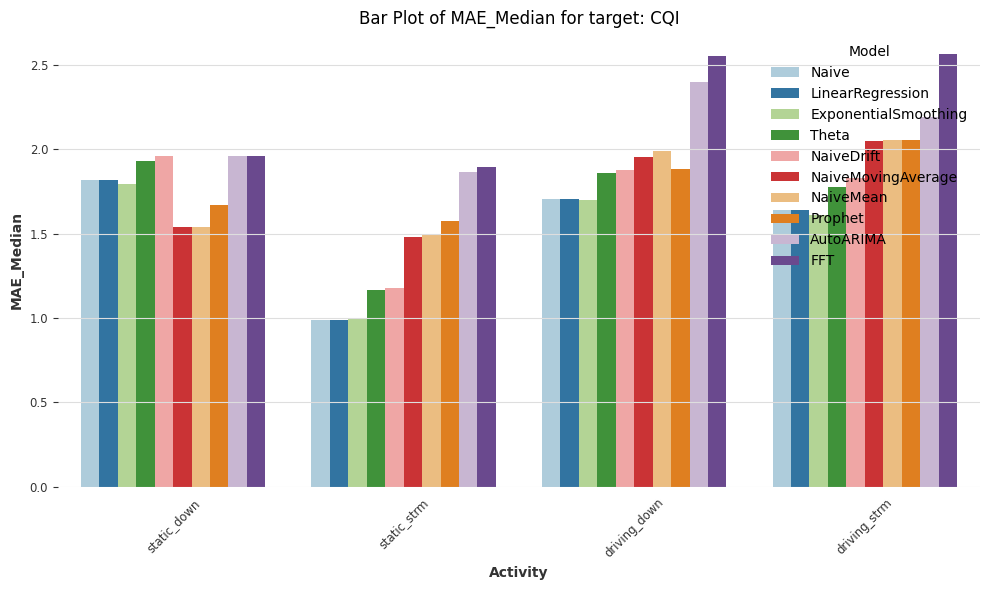

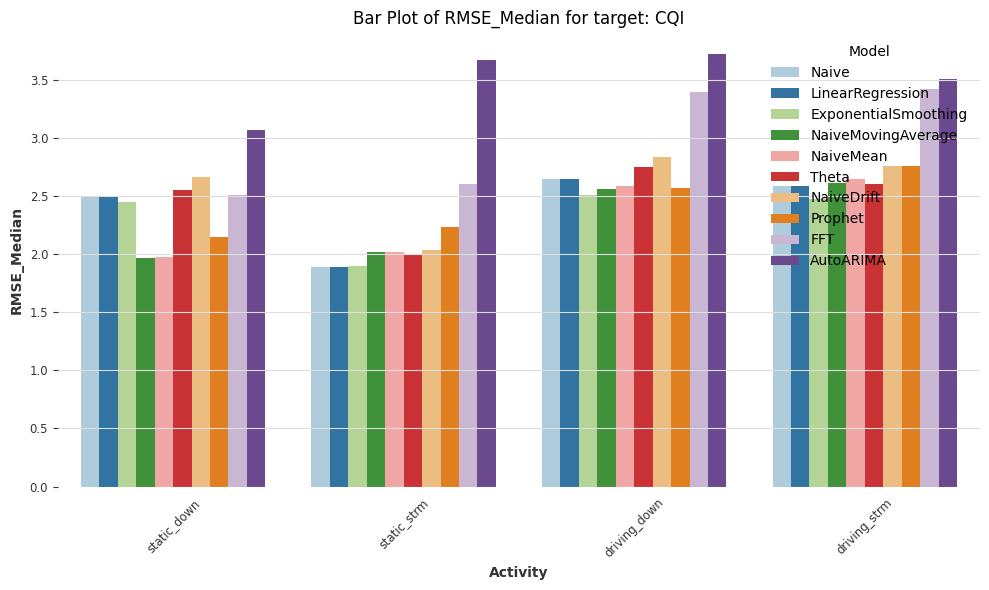

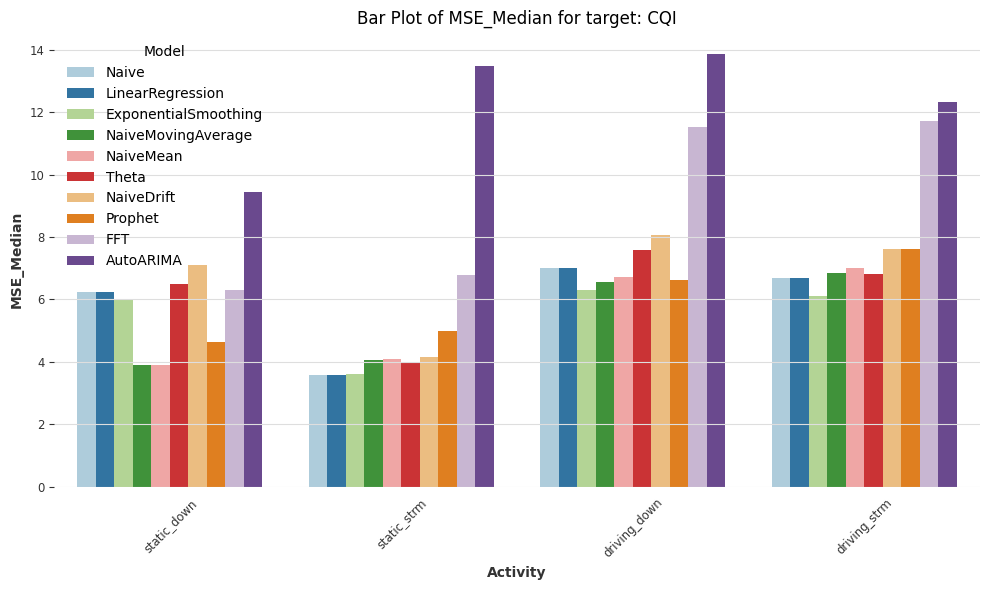

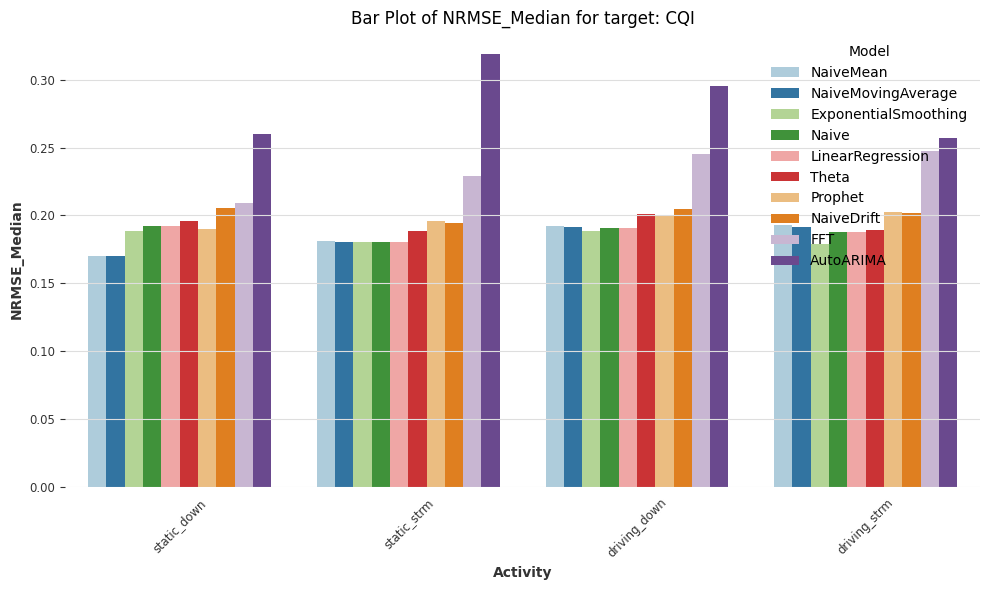

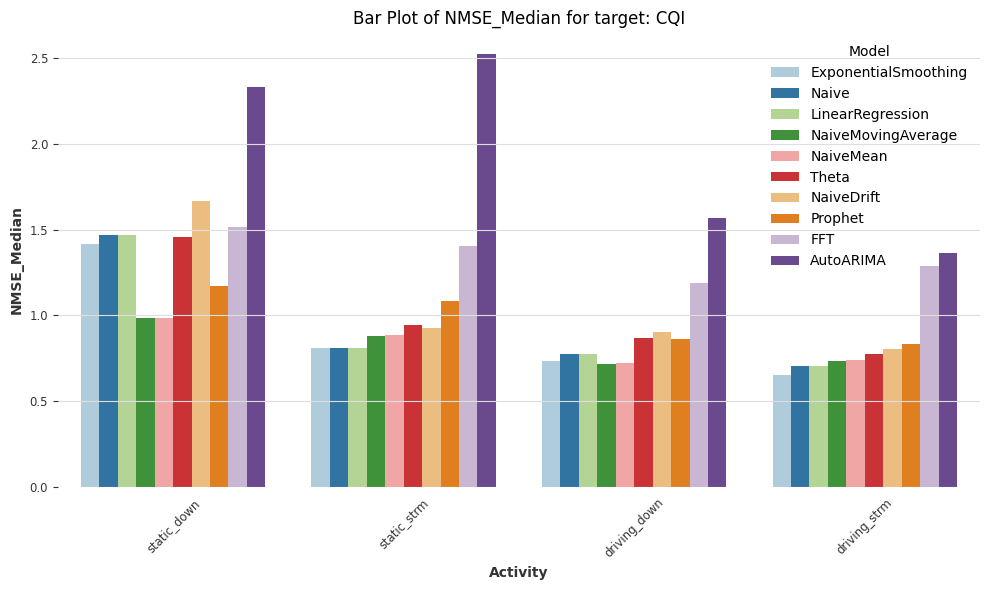

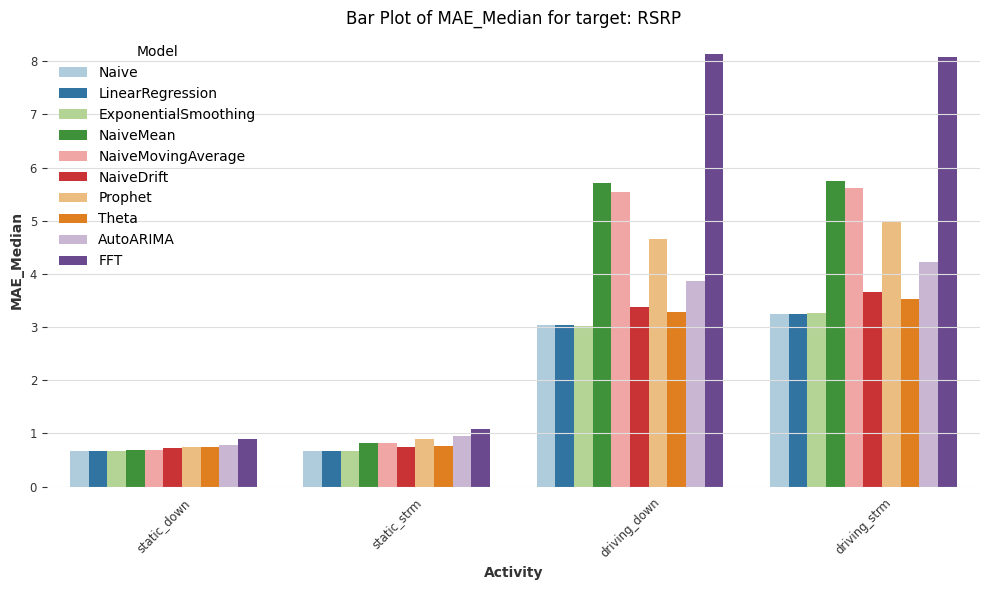

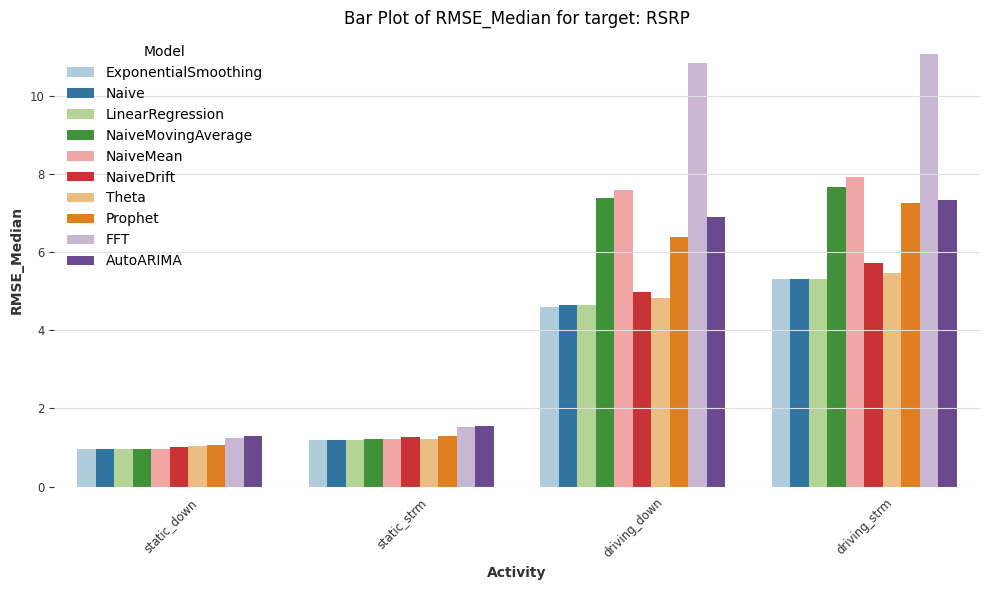

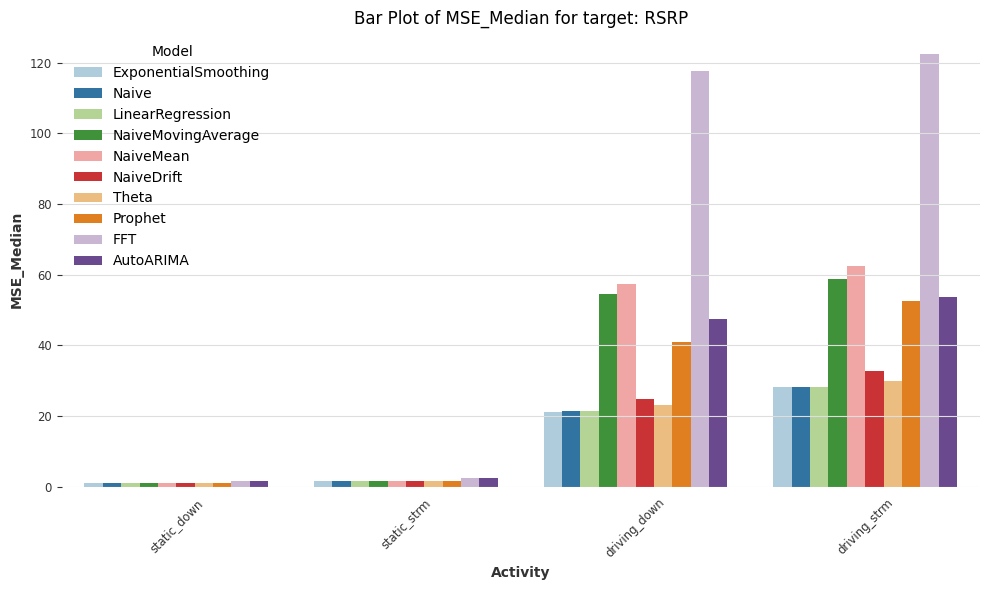

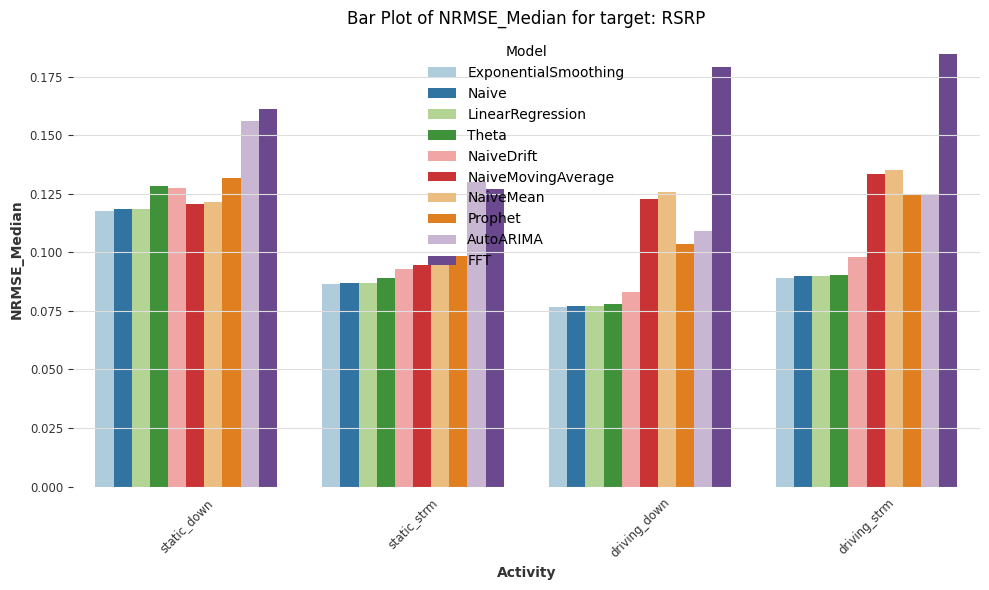

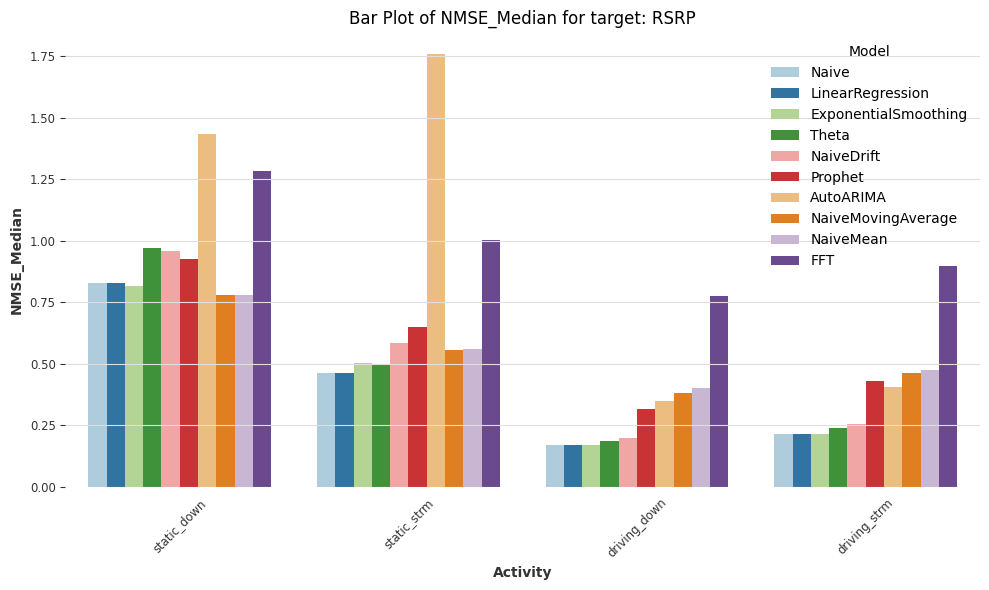

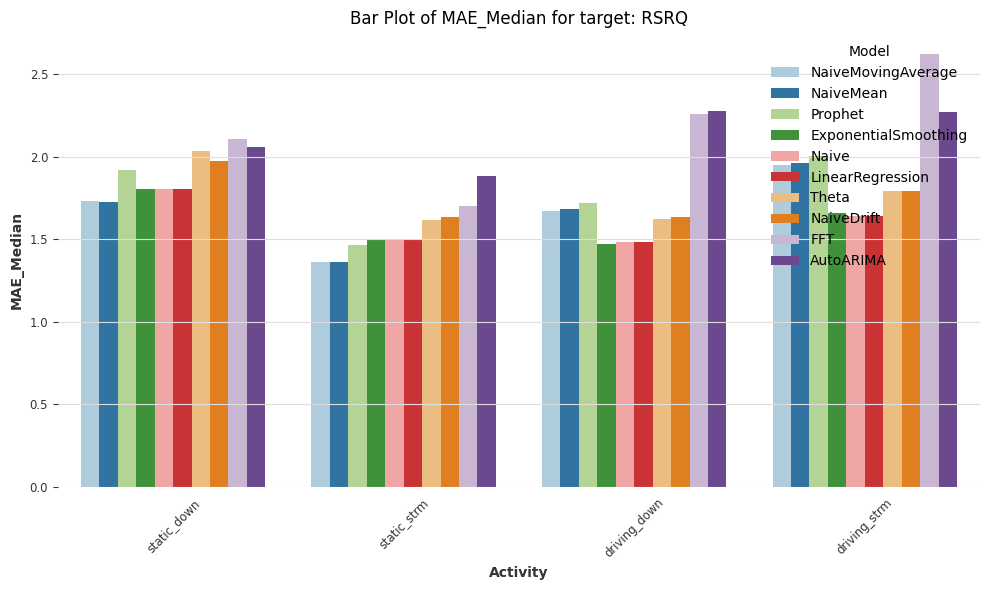

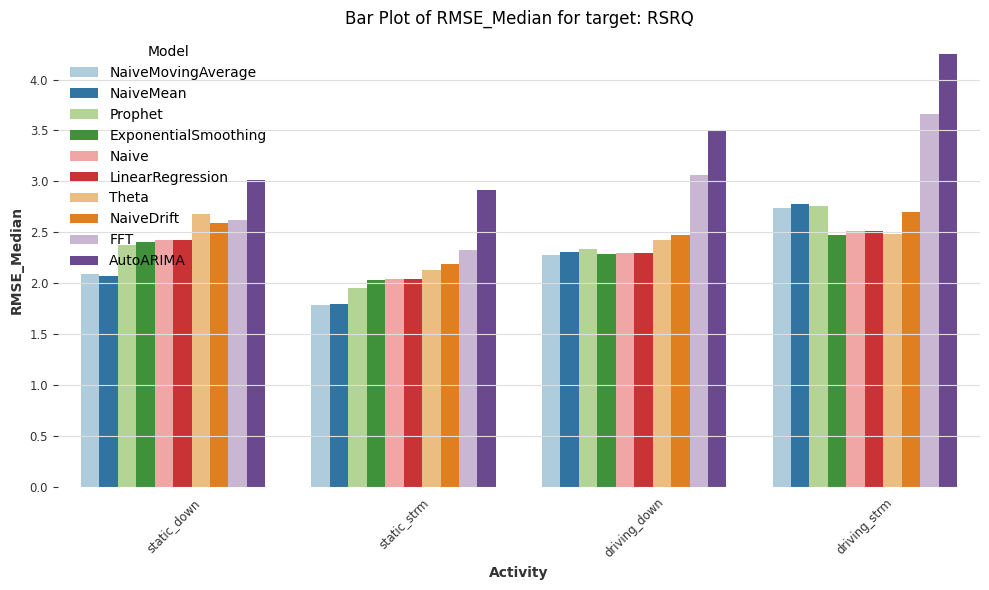

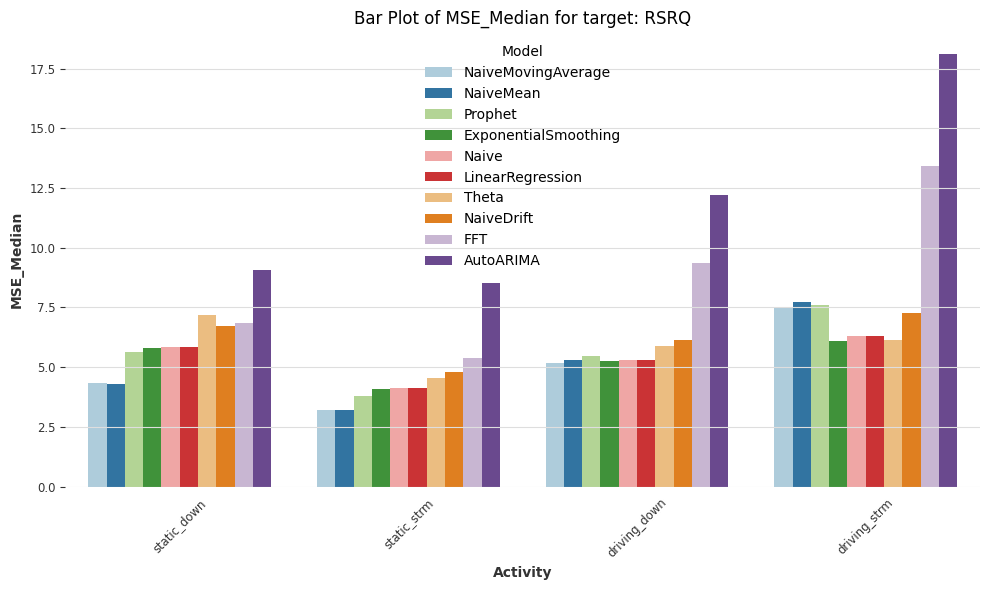

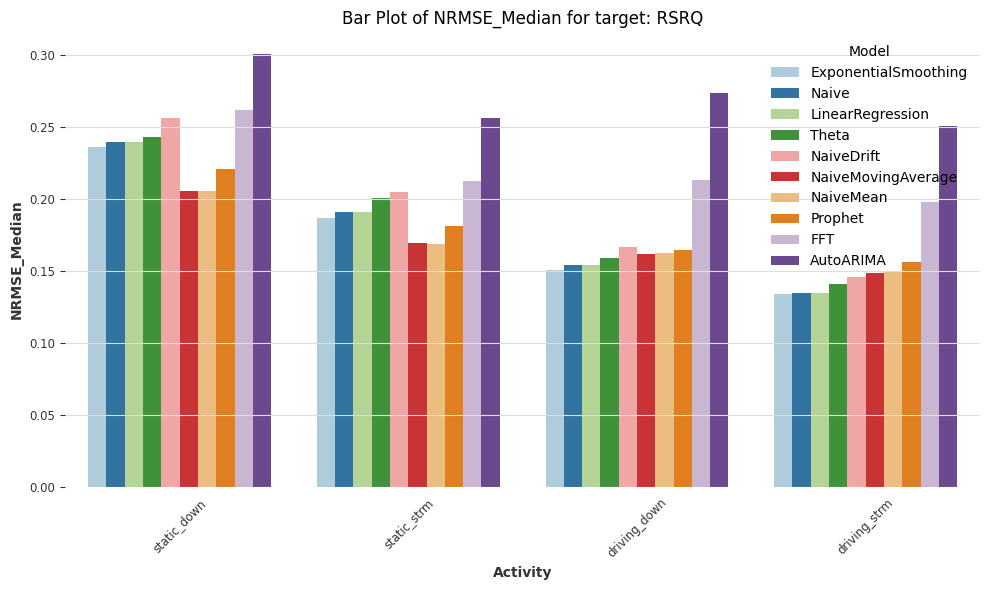

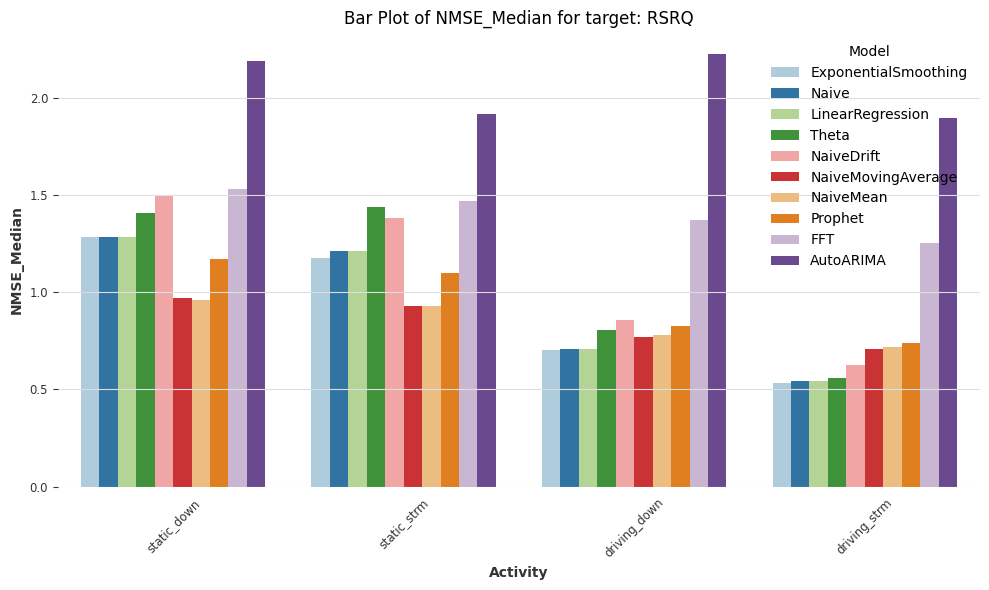

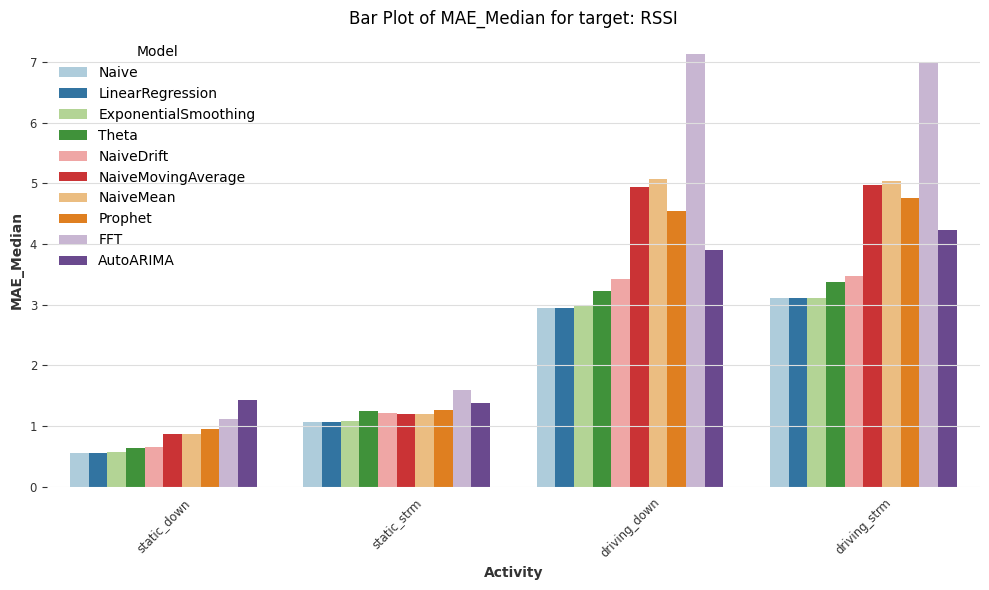

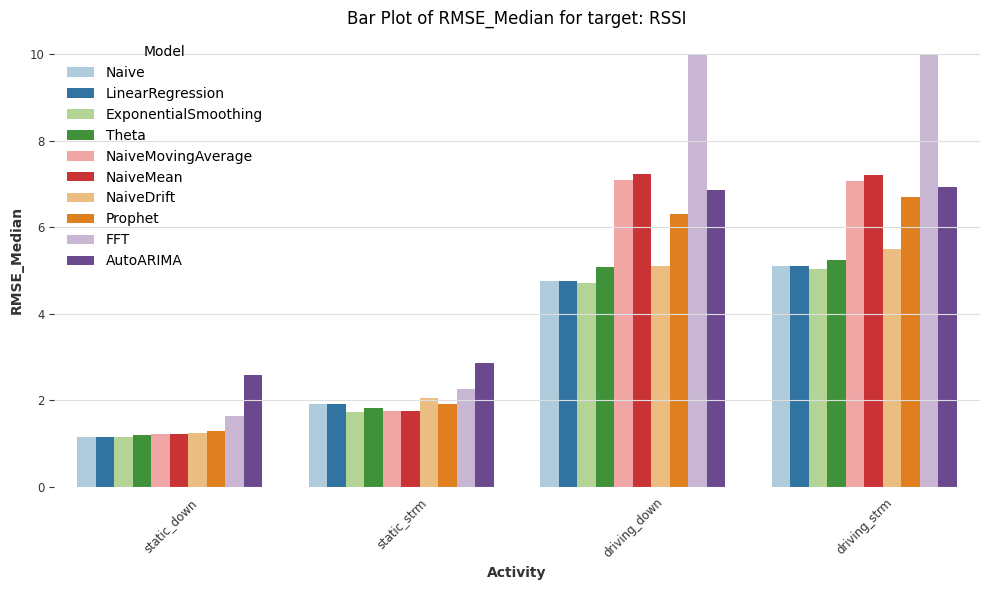

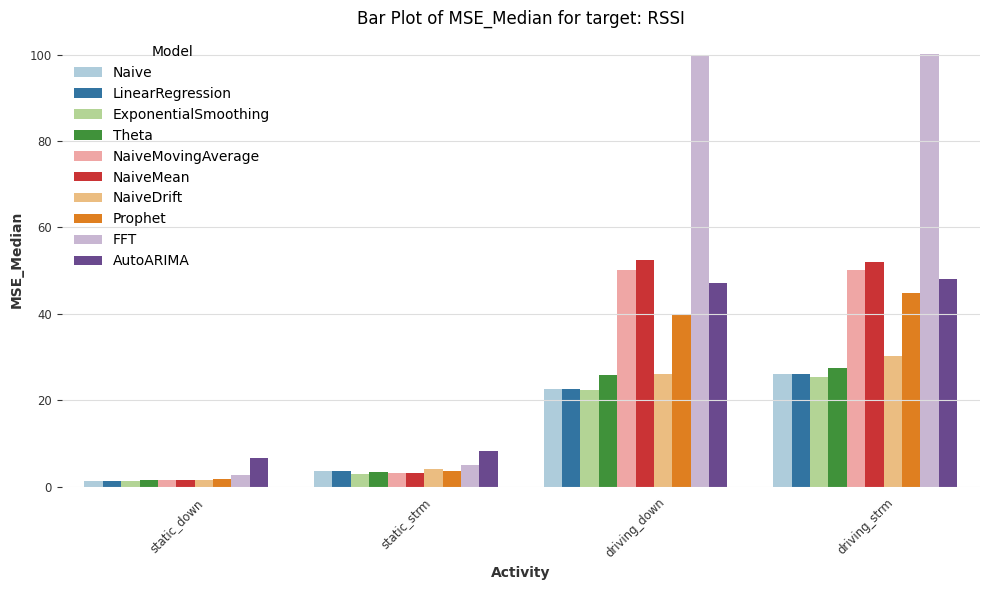

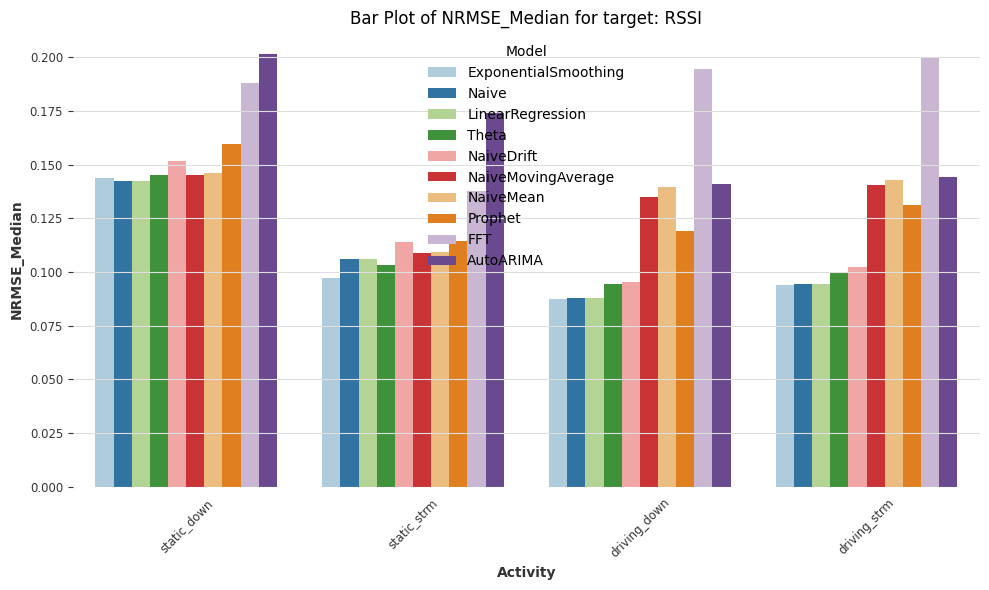

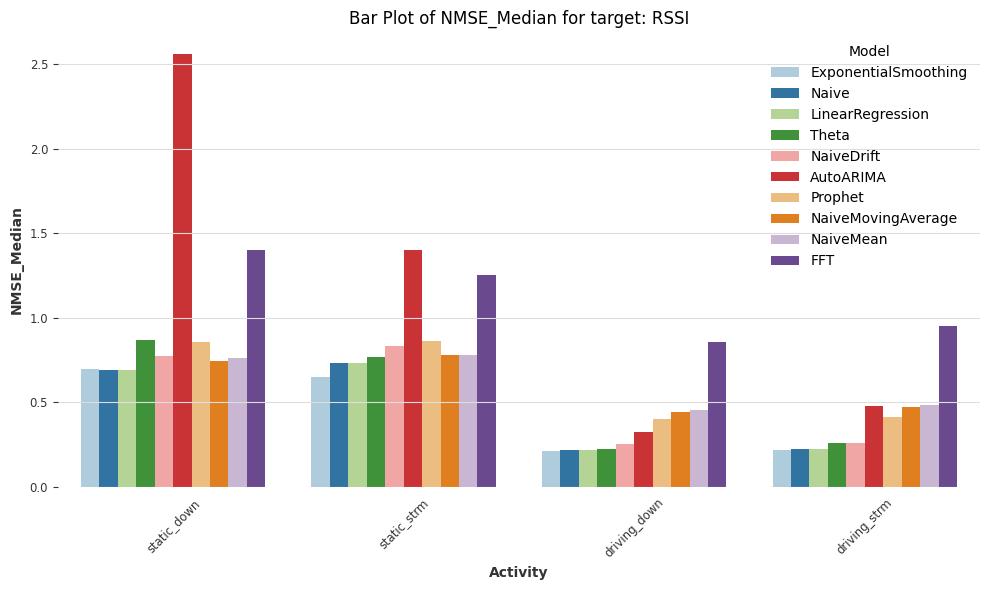

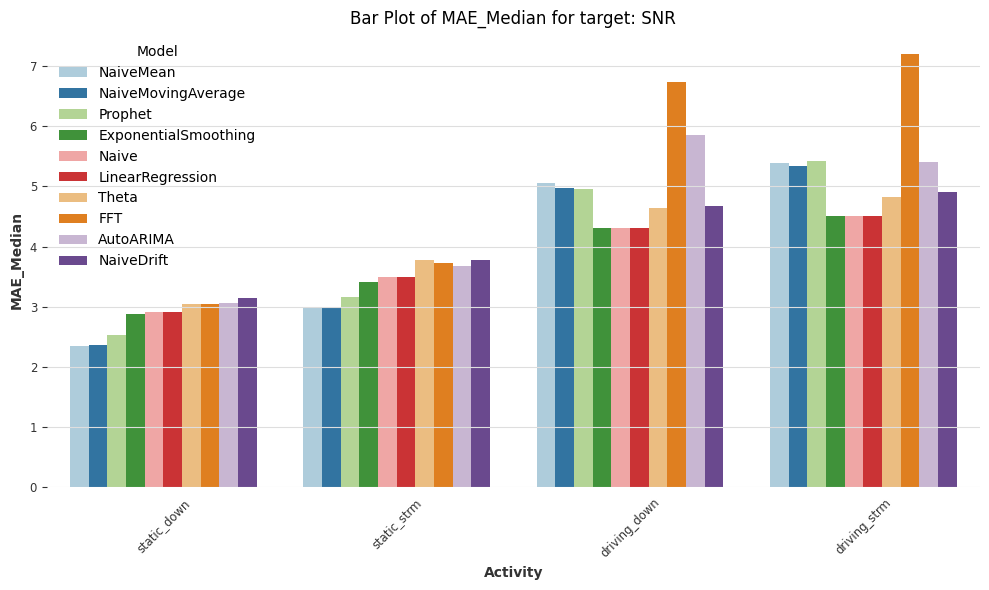

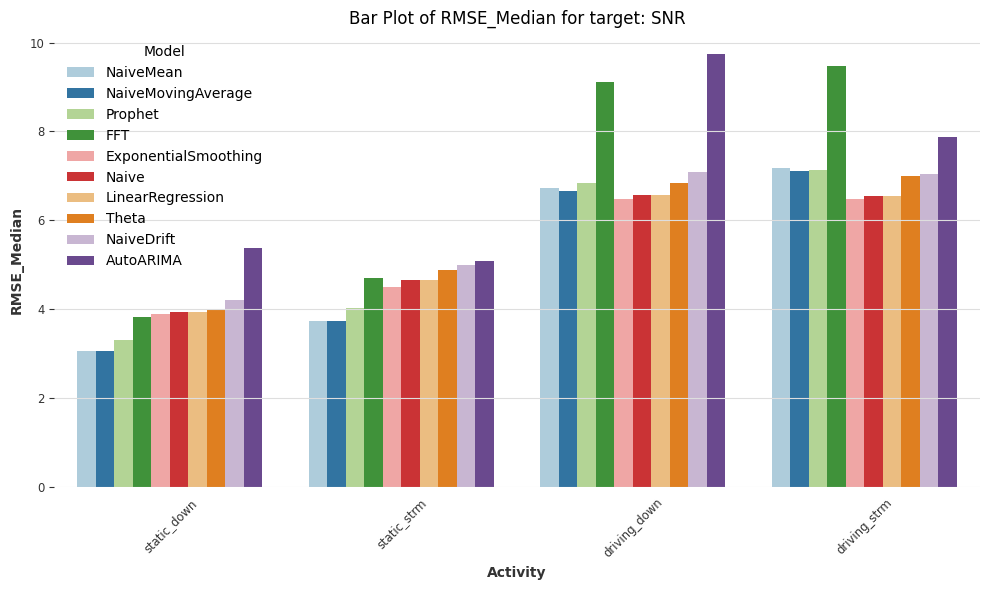

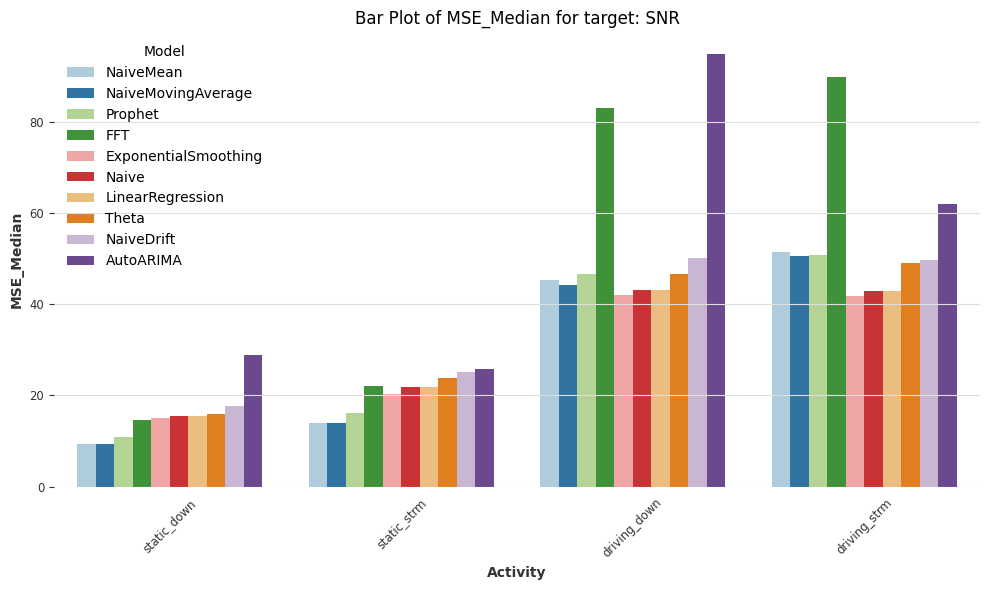

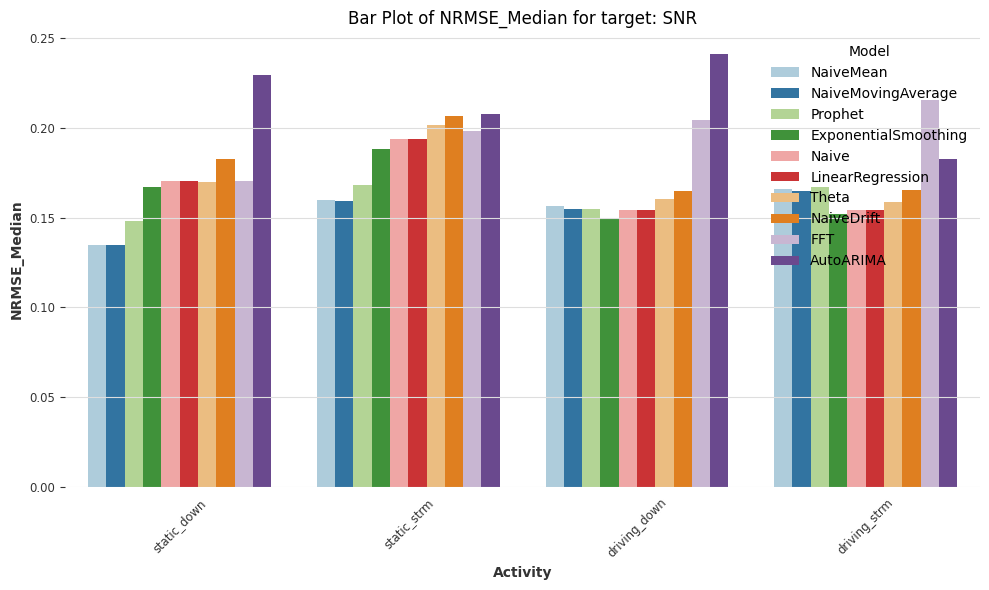

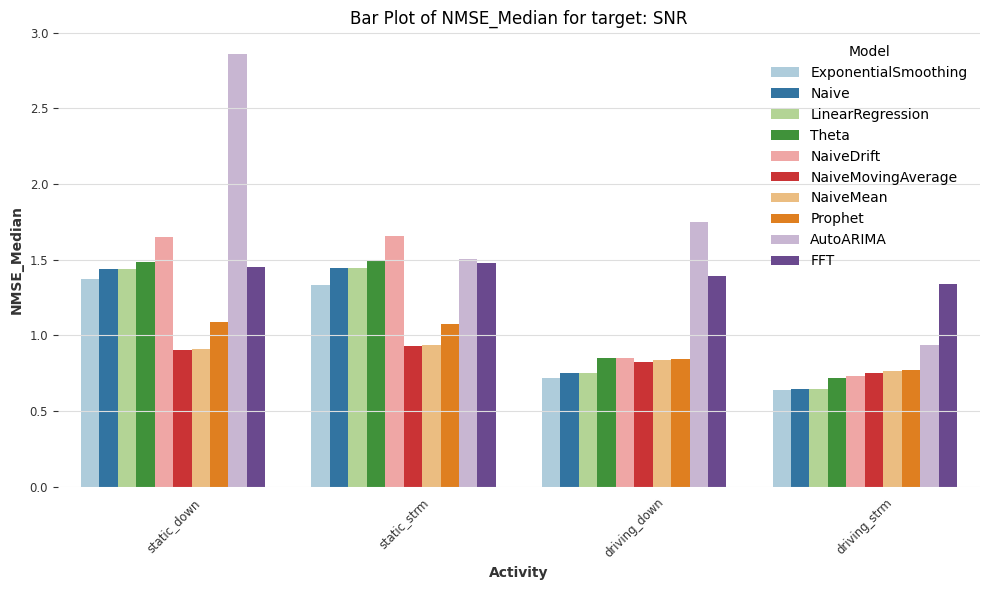

In [14]:
plot_bar_for_medians_by_target(agg_data)

## Boxplot das métricas

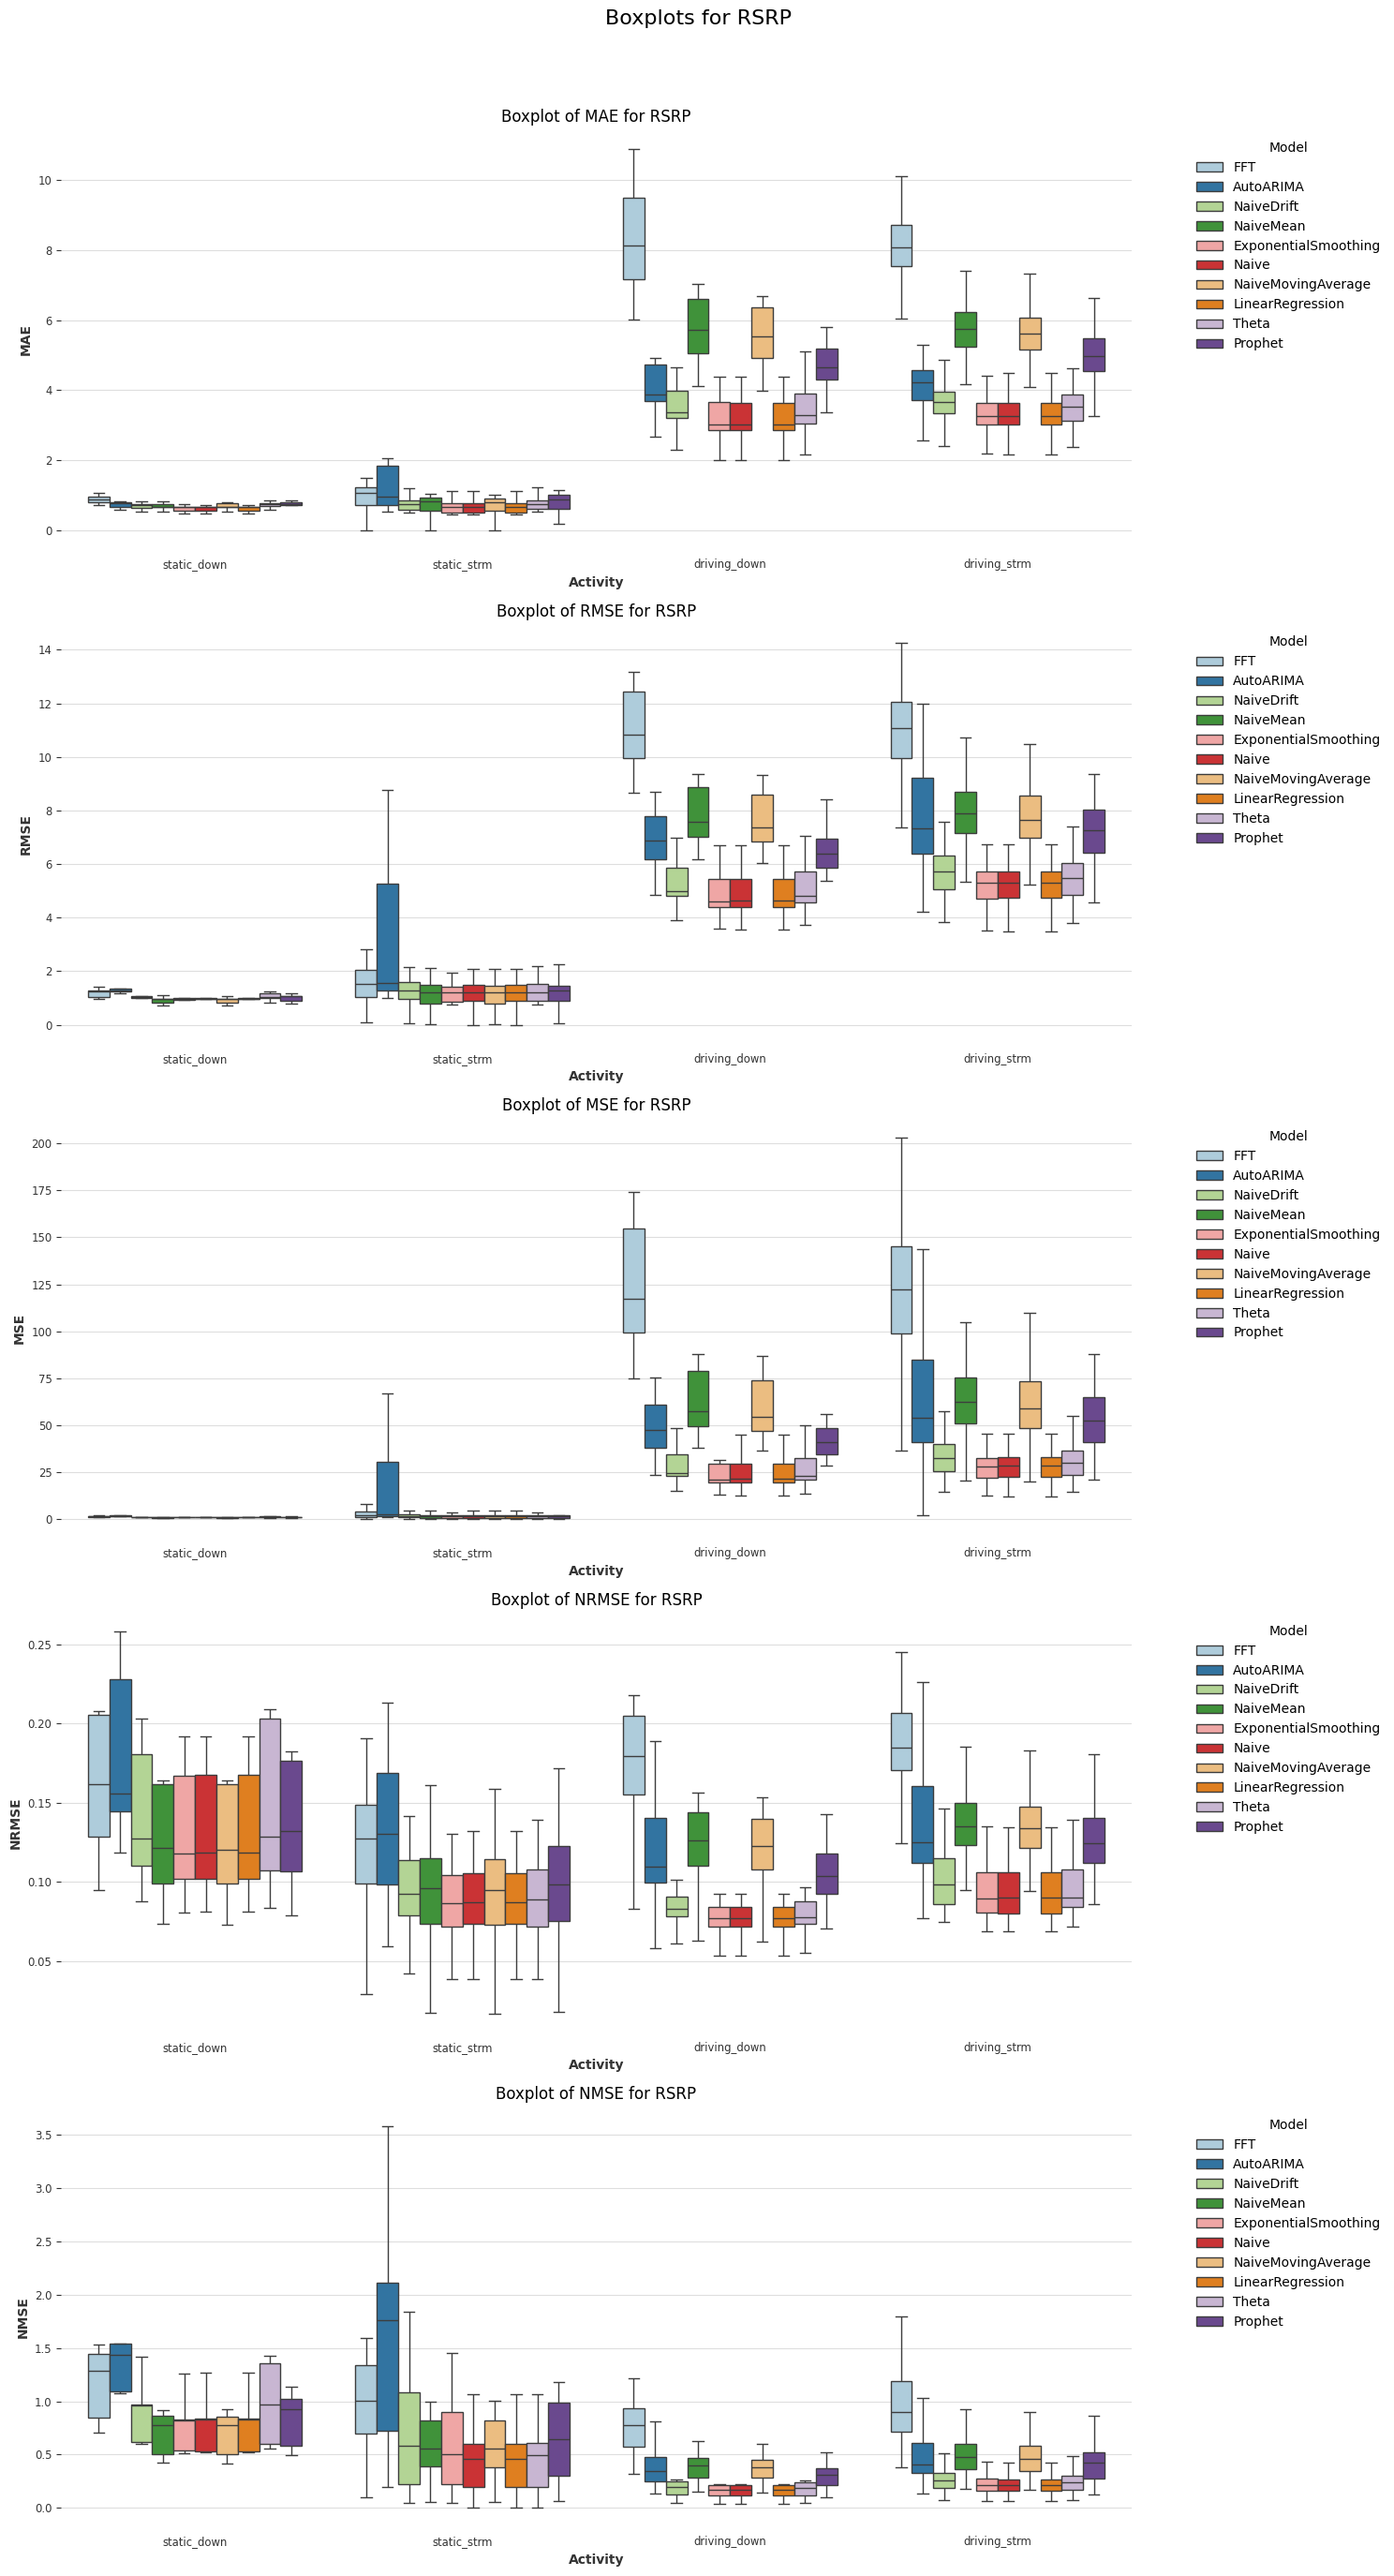

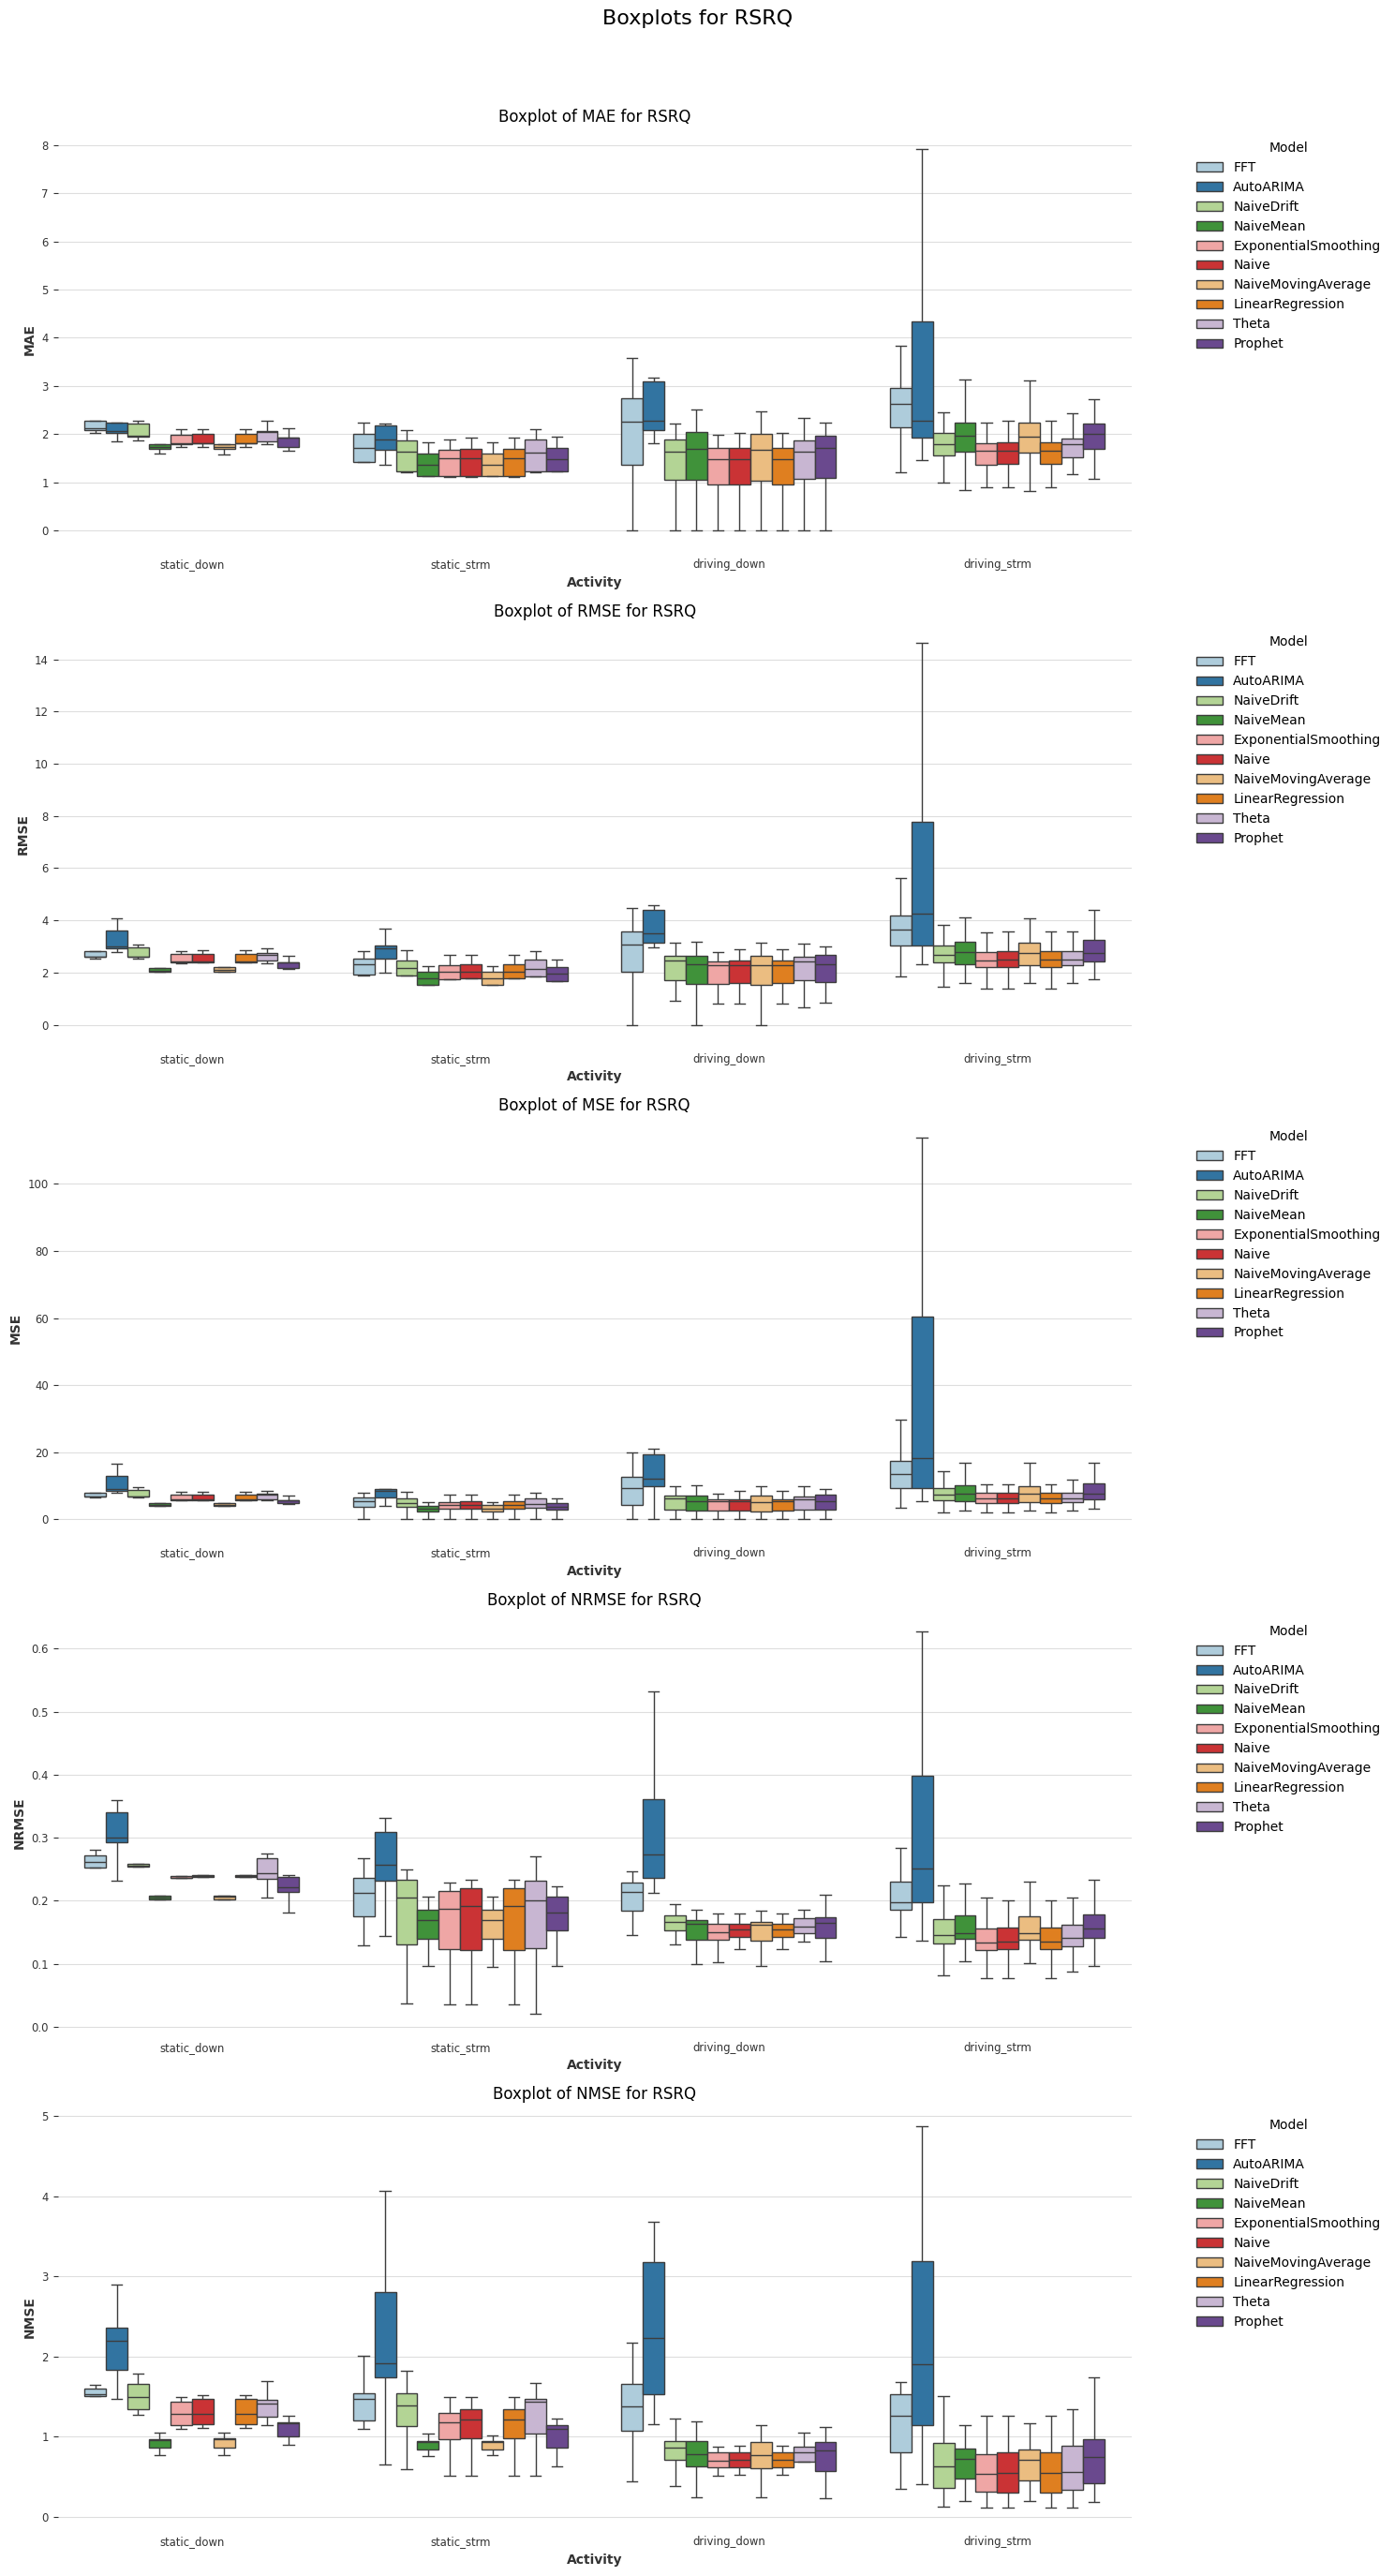

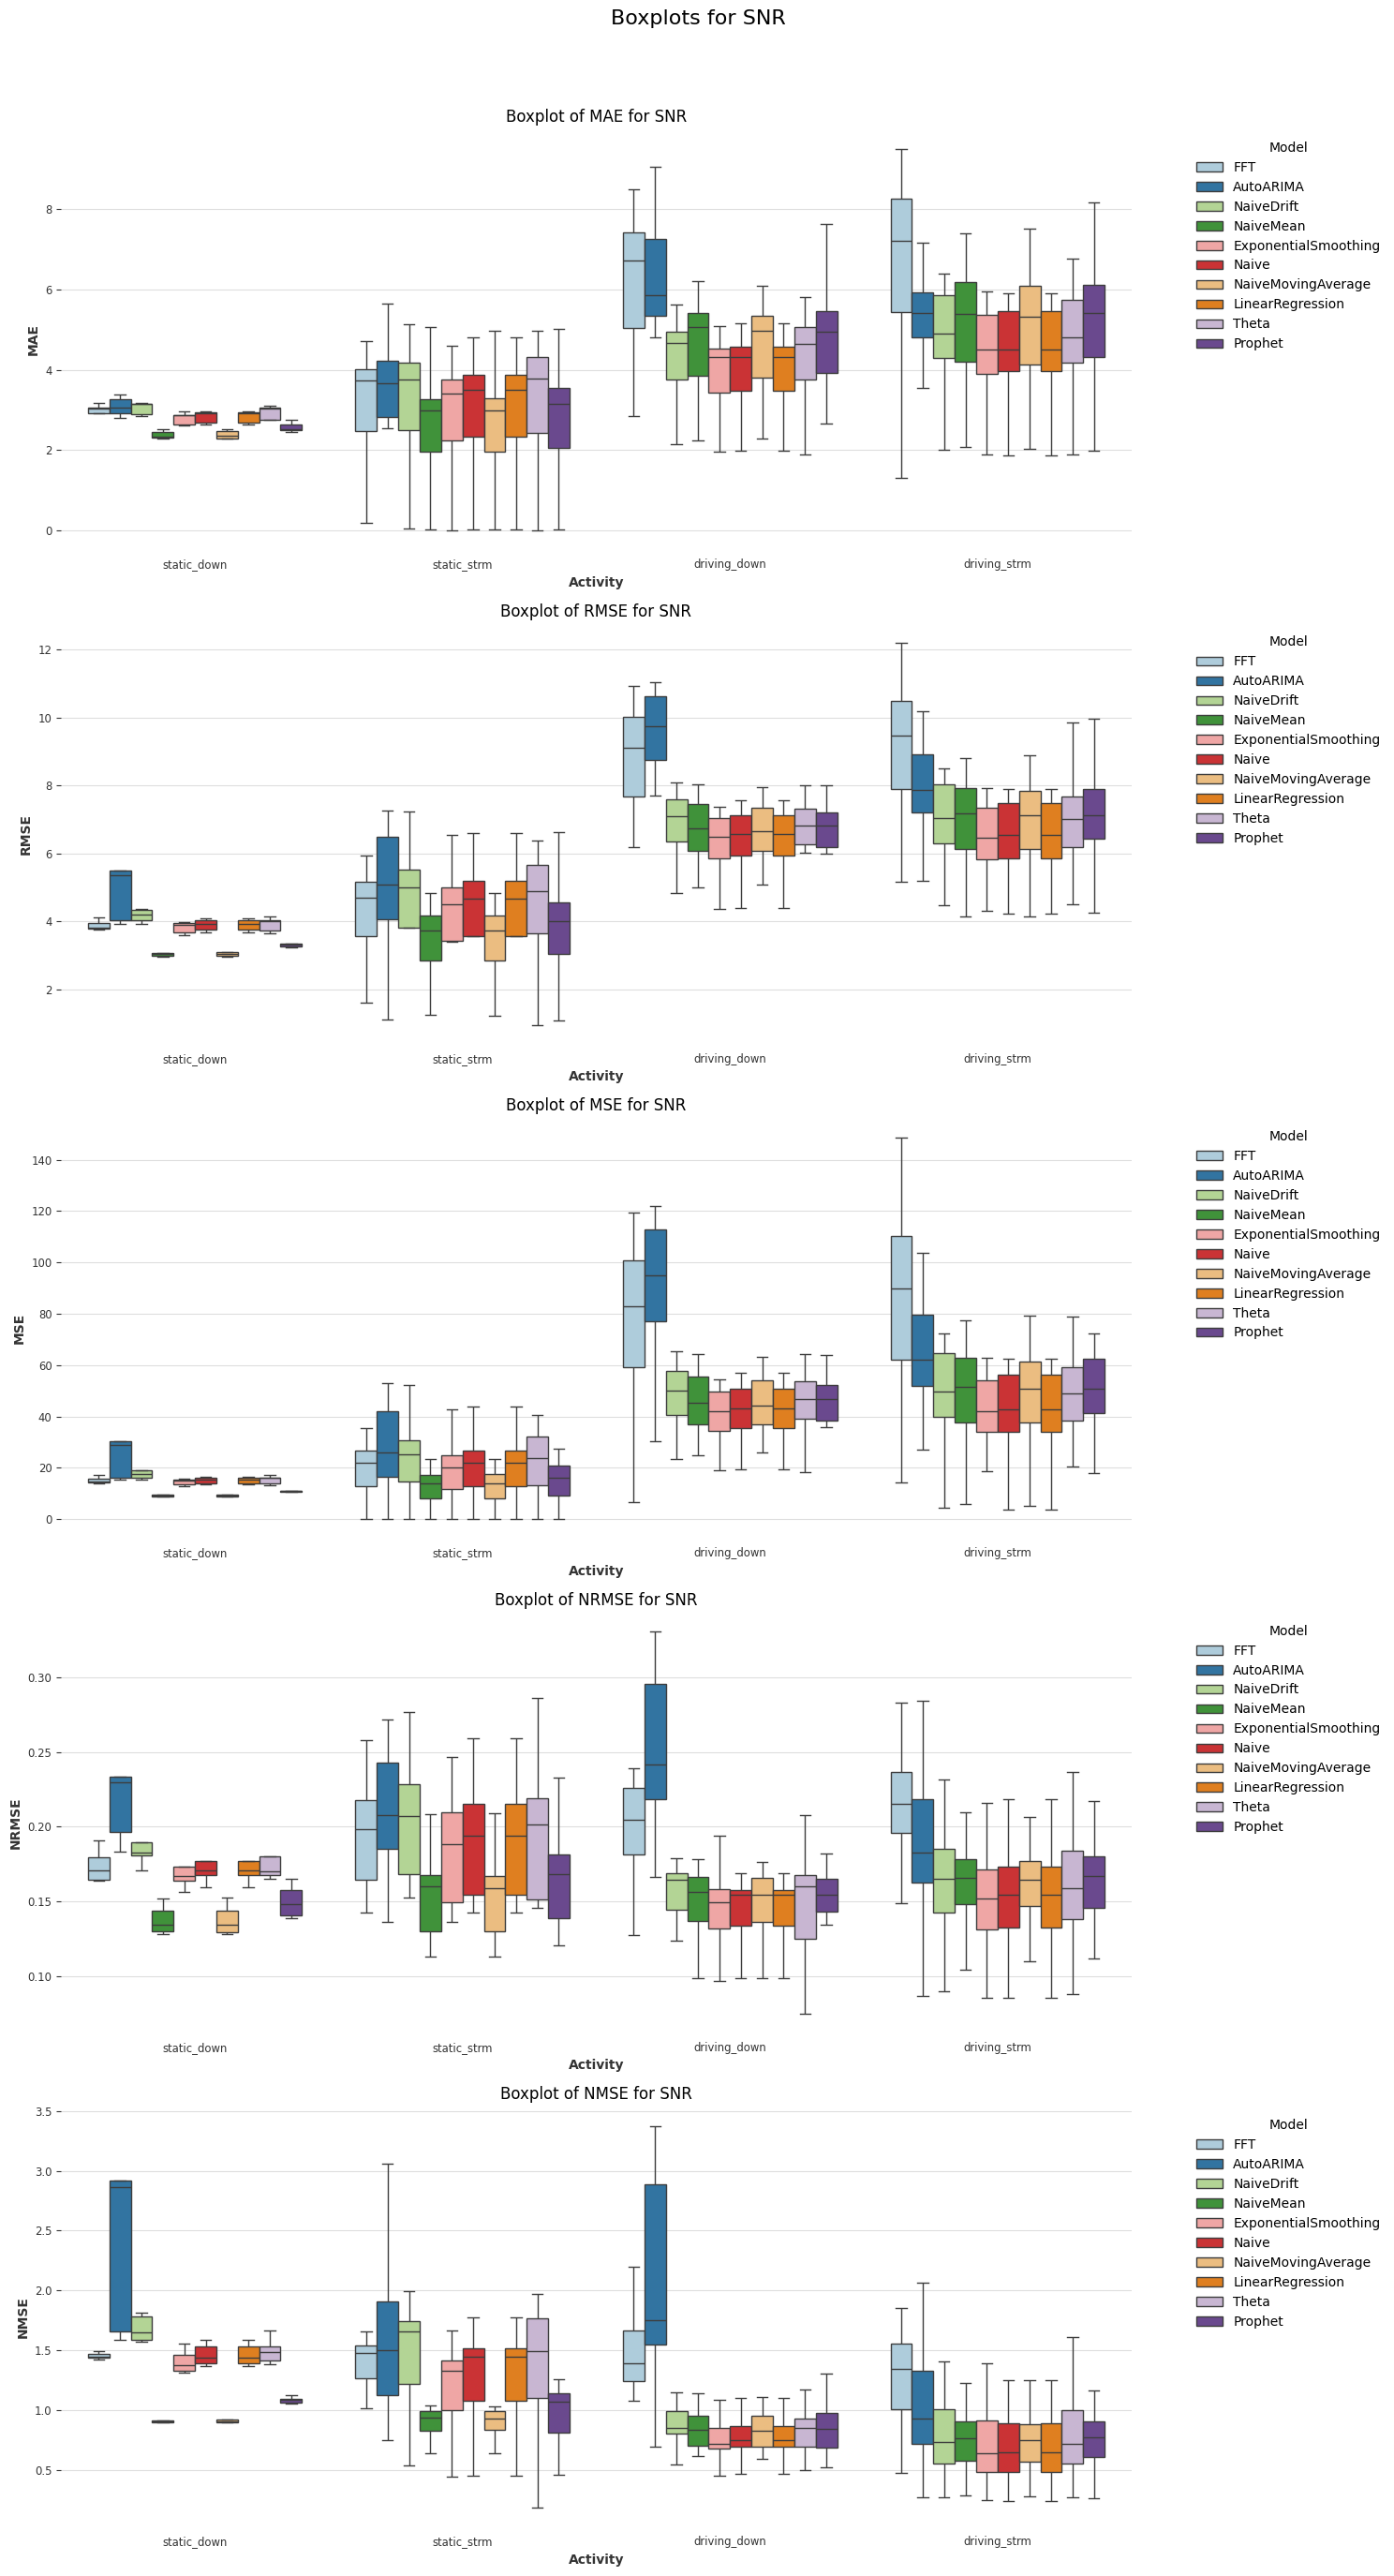

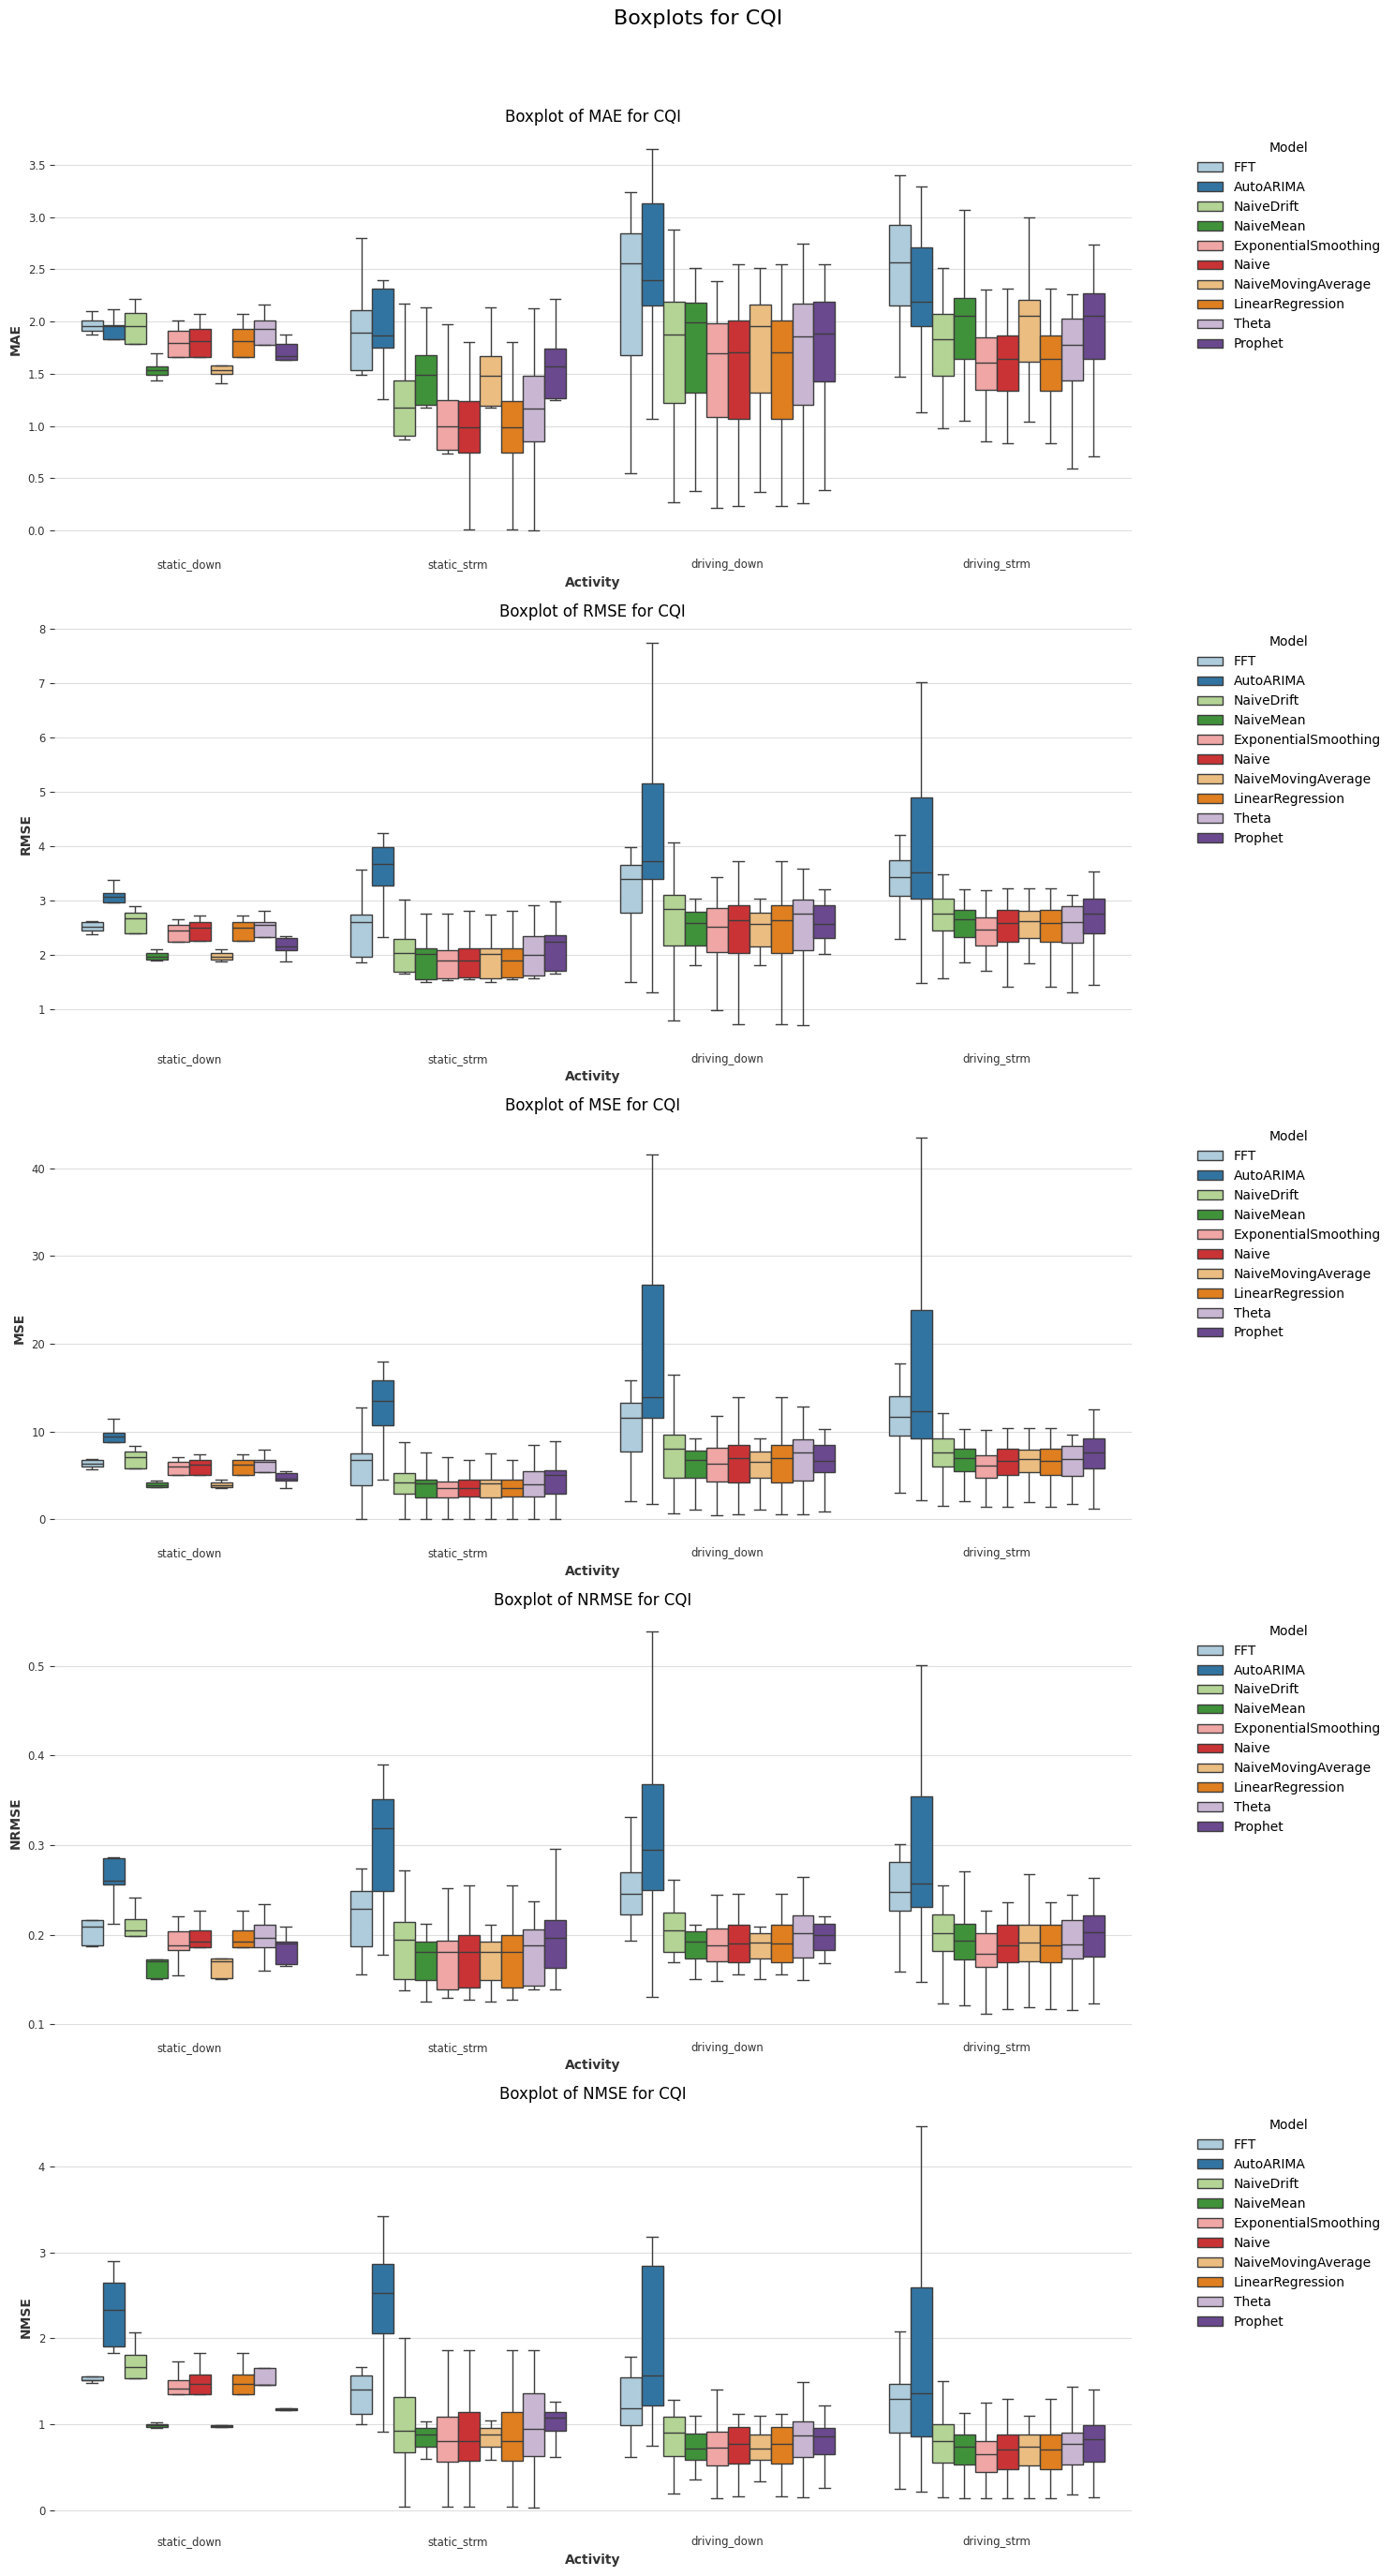

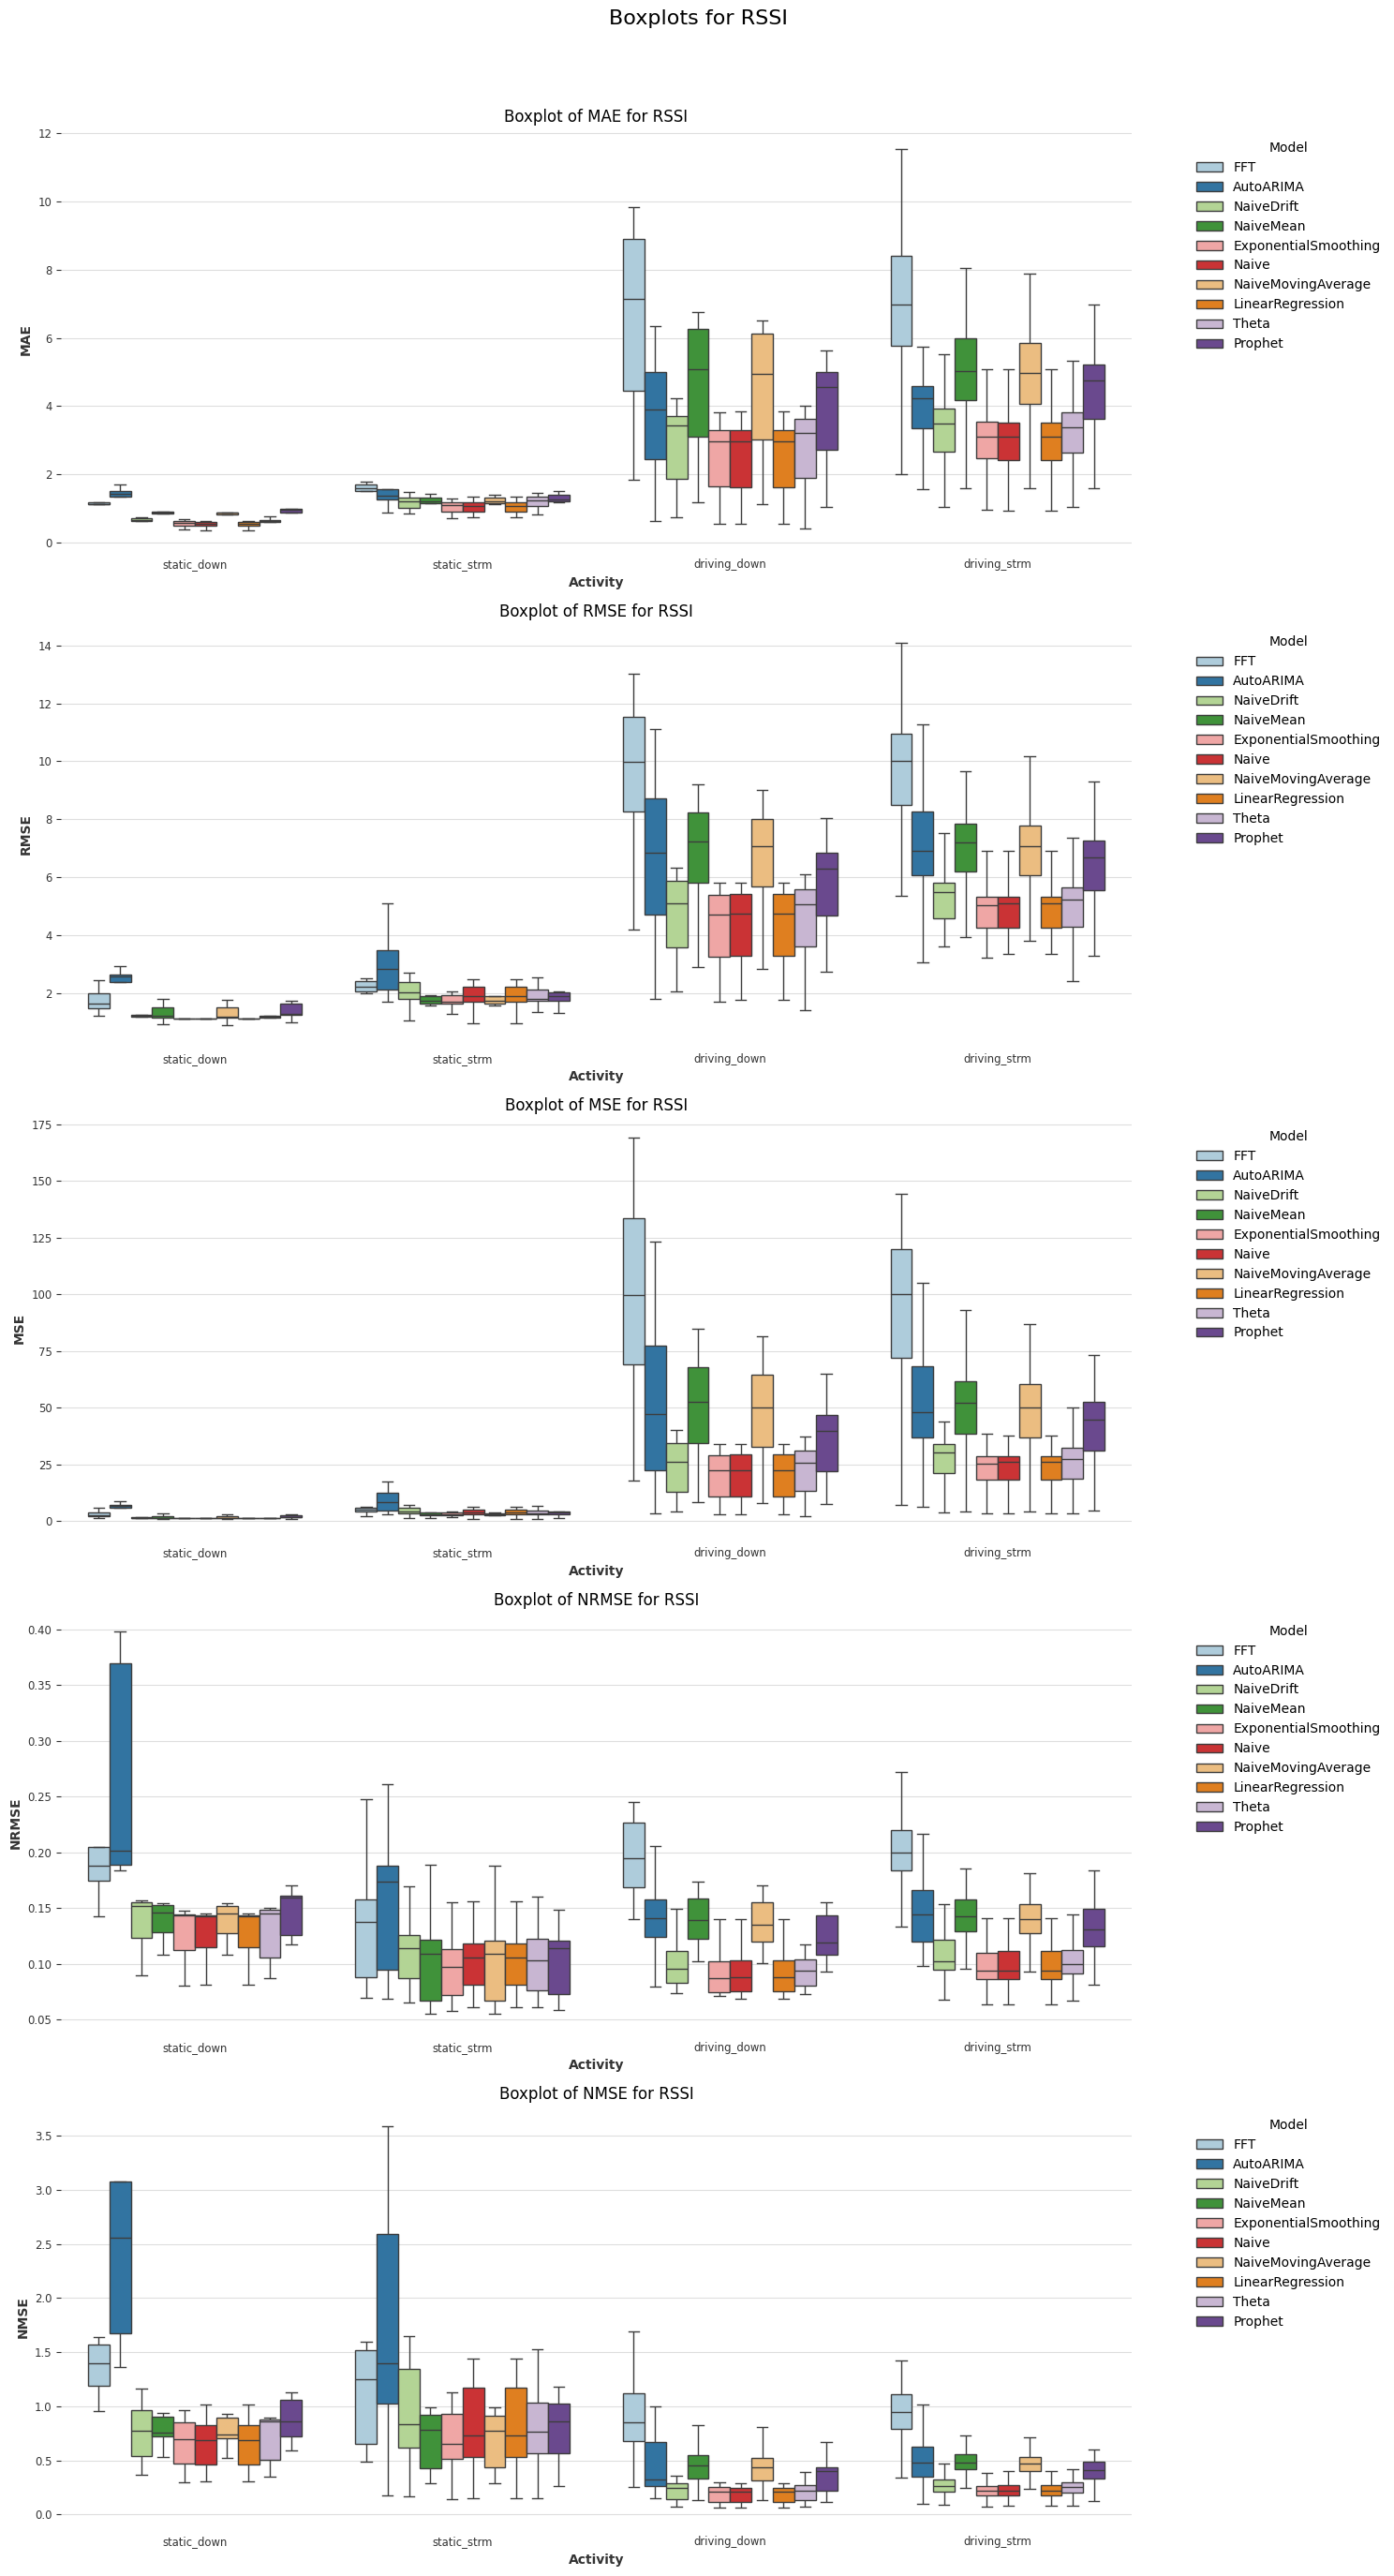

In [15]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

# Lendo os resultados das métricas geradas por um modelo

In [16]:
def query_lowest_metric(df, metric):
    """
    Realiza uma query no DataFrame que retorna as linhas com o menor valor da métrica especificada para cada combinação de Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas 'Model', 'target', 'Activity' e as métricas.
    metric (str): Nome da métrica a ser avaliada ('MAE', 'RMSE' ou 'MSE').

    Retorna:
    pd.DataFrame: DataFrame contendo as linhas com o menor valor da métrica para cada grupo de Model, target e Activity.
    """
    
    # Verificar se a métrica especificada é válida
    if metric not in ['MAE', 'RMSE', 'MSE']:
        raise ValueError(f"Métrica '{metric}' não é válida. Escolha entre 'MAE', 'RMSE' ou 'MSE'.")

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ['Model', 'target', 'Activity', metric]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Obter os índices das linhas com o menor valor da métrica para cada combinação de Model, target e Activity
    idx = df.groupby(['Model', 'target', 'Activity'])[metric].idxmin()

    # Retornar as linhas correspondentes ao menor valor da métrica
    result = df.loc[idx]

    return result

In [17]:
lowest_mae = query_lowest_metric(df_metrics, 'MAE')
lowest_rmse = query_lowest_metric(df_metrics, 'RMSE')
lowest_mse = query_lowest_metric(df_metrics, 'MSE')

In [18]:
lowest_mae

Time_Index      Model  \
145   [2020-02-14T12:59:07.000000000, 2020-02-14T12:...  AutoARIMA   
755   [2019-12-02T09:40:25.000000000, 2019-12-02T09:...  AutoARIMA   
2024  [2019-12-16T13:40:54.000000000, 2019-12-16T13:...  AutoARIMA   
1641  [2019-11-28T09:22:35.000000000, 2019-11-28T09:...  AutoARIMA   
117   [2020-02-13T13:04:14.000000000, 2020-02-13T13:...  AutoARIMA   
...                                                 ...        ...   
3201  [2019-12-23T10:31:25.000000000, 2019-12-23T10:...      Theta   
1504  [2020-02-27T17:31:05.000000000, 2020-02-27T17:...      Theta   
4095  [2019-12-02T09:40:25.000000000, 2019-12-02T09:...      Theta   
1773  [2020-01-16T10:44:24.000000000, 2020-01-16T10:...      Theta   
3134  [2020-01-06T09:56:24.000000000, 2020-01-06T09:...      Theta   

                                                Actuals  \
145   [14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 14.0, 14....   
755   [8.0, 8.0, 8.0, 8.0, 8.0, 13.999999999999998, ...   
2024  [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   
1641  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   
117   [-99.0, -93.0, -93.0, -92.0, -92.0, -92.0, -90...   
...                                                 ...   
3201  [-85.0, -85.0, -85.5, -85.99999999999999, -86....   
1504  [-2.0, -2.0, 0.0, 0.0, -1.0, -1.0, -1.0, 1.0, ...   
4095  [7.0, 7.0, 10.0, 10.0, 9.0, 9.0, 5.0, 5.0, 5.0...   
1773  [-0.9999999999999993, -0.9999999999999993, -0....   
3134  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....   

                                                  Preds  ElapsedTime target  \
145   [14.075388311546599, 13.661517967601764, 13.66...    20.652354    CQI   
755   [6.347234695332148, 3.717407522453008, 1.04052...    16.630062    CQI   
2024  [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   132.629273    CQI   
1641  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   238.378127    CQI   
117   [-99.41720703139154, -99.52900129075675, -99.5...   176.826534   RSRP   
...                                                 ...          ...    ...   
3201  [-85.3750292370542, -85.3750292370542, -85.375...     8.600890   RSSI   
1504  [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....     0.771755    SNR   
4095  [7.500000007450581, 7.500000007450581, 7.50000...     0.932346    SNR   
1773  [0.5319570296101408, 0.7834068409076166, -2.07...     5.285993    SNR   
3134  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....     3.300214    SNR   

          Activity       MAE      RMSE        MSE     NRMSE      NMSE  
145   driving_down  1.068171  1.309548   1.714916  0.130955  0.747538  
755   driving_strm  0.581342  2.510187   6.301040  0.209182  1.266539  
2024   static_down  1.539037  2.577102   6.641456  0.286345  1.832134  
1641   static_strm  1.253523  2.323637   5.399290  0.211240  0.966396  
117   driving_down  2.673824  7.702151  59.323137  0.122256  0.347149  
...            ...       ...       ...        ...       ...       ...  
3201   static_strm  0.559861  1.033788   1.068719  0.103379  0.256333  
1504  driving_down  0.371456  1.205527   1.453296  0.075345  0.716014  
4095  driving_strm  0.541031  2.025322   4.101929  0.088057  0.272826  
1773   static_down  2.757058  3.638770  13.240645  0.165399  1.384144  
3134   static_strm  0.000000  0.000000   0.000000       NaN       NaN  

[200 rows x 12 columns]

## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [19]:
def plot_actual_vs_preds(result_df: pd.DataFrame, model: str, target: str, activity: str) -> None:
    """
    Plota as séries temporais reais versus as predições para uma combinação específica de Model, target e Activity.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals", "Preds", "Model", "target", "Activity".
        model (str): O modelo a ser filtrado.
        target (str): O alvo a ser filtrado.
        activity (str): A atividade a ser filtrada.
    """
    # Filtra o DataFrame com base nos parâmetros fornecidos
    filtered_df = result_df[(result_df["Model"] == model) & 
                             (result_df["target"] == target) & 
                             (result_df["Activity"] == activity)]
    print(filtered_df[["MAE", "RMSE", "MSE"]])

    # Verifica se a filtragem resultou em algum dado
    if filtered_df.empty:
        raise ValueError("Nenhum dado encontrado para os parâmetros fornecidos.")

    # Obtém os dados da primeira linha do DataFrame filtrado
    time_index = pd.DatetimeIndex(filtered_df["Time_Index"].iloc[0])
    actuals = filtered_df["Actuals"].iloc[0]
    preds = filtered_df["Preds"].iloc[0]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(label="Predições", color="red", linestyle='--')  # Linha tracejada para predições

    # Adiciona título, legendas e labels
    plt.title(f"Comparação entre Reais e Predições - Model: {model}, Target: {target}, Activity: {activity}")
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

           MAE      RMSE       MSE
2026  0.594476  1.182585  1.398508


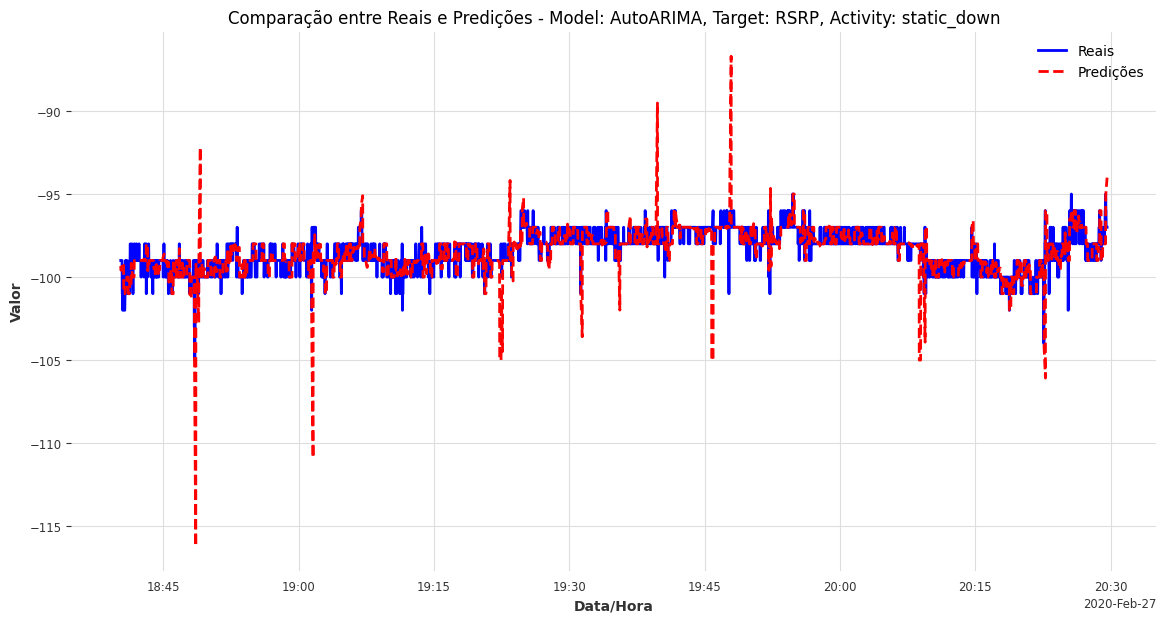

          MAE      RMSE       MSE
477  0.484425  0.809022  0.654517


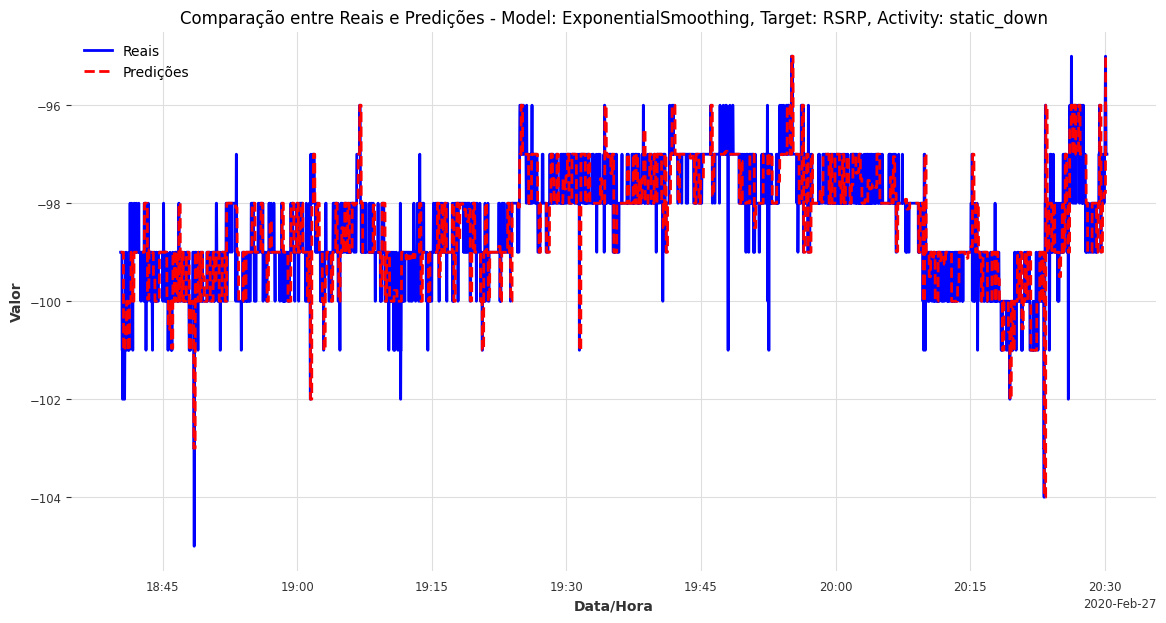

           MAE      RMSE       MSE
3821  0.708379  0.948465  0.899586


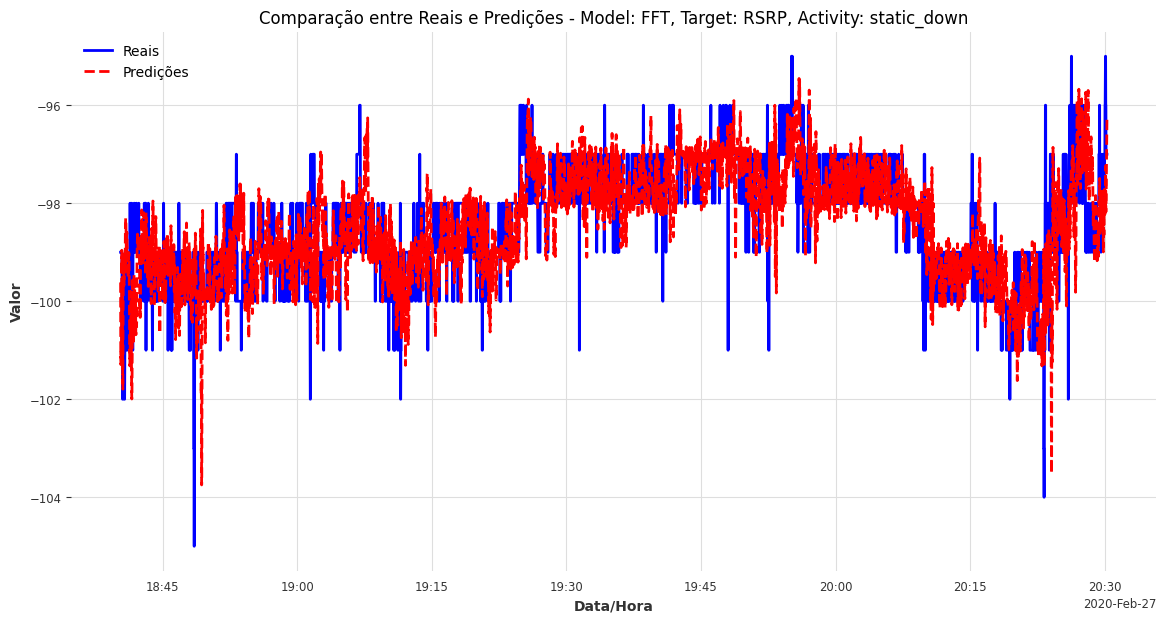

           MAE      RMSE      MSE
1127  0.480303  0.813517  0.66181


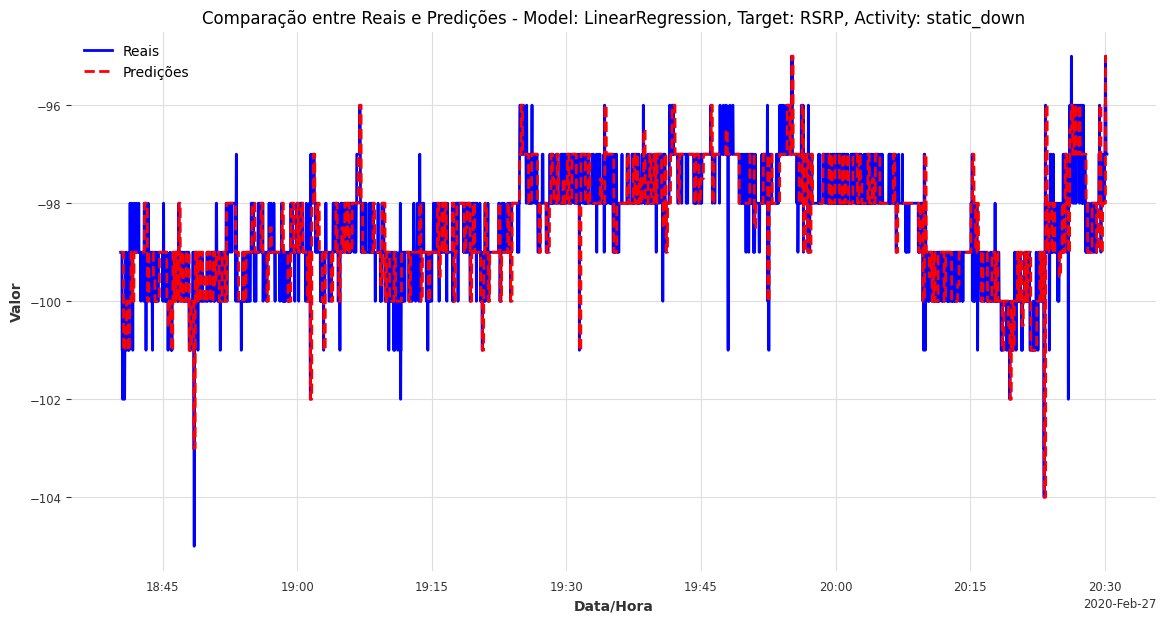

           MAE      RMSE      MSE
2271  0.480303  0.813517  0.66181


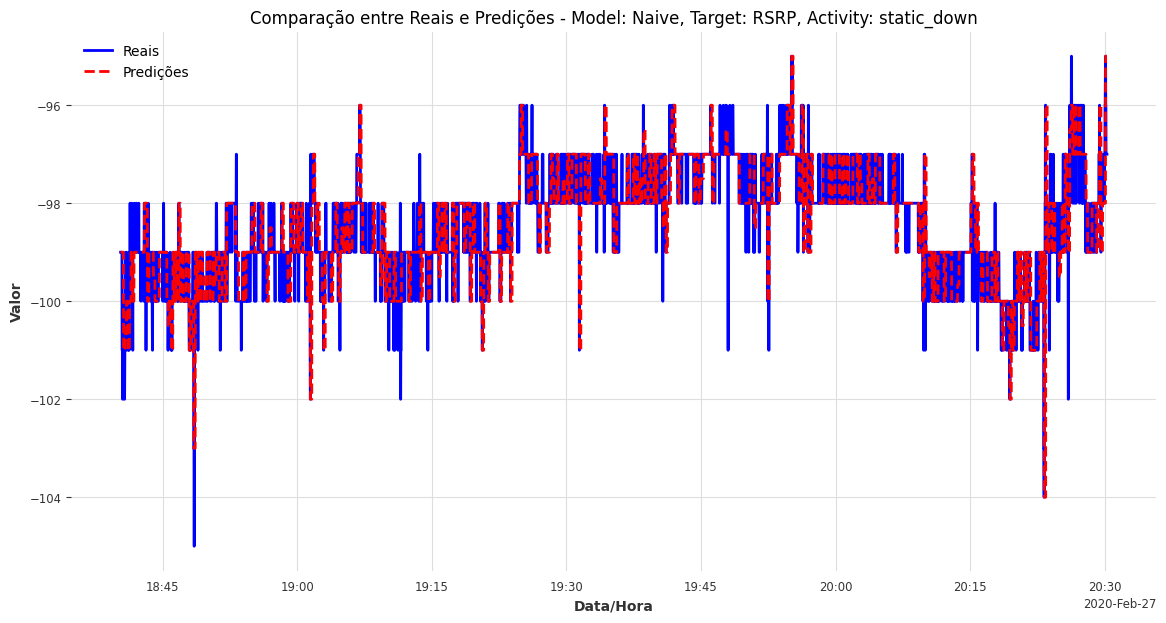

          MAE      RMSE       MSE
1152  0.54762  0.877425  0.769875


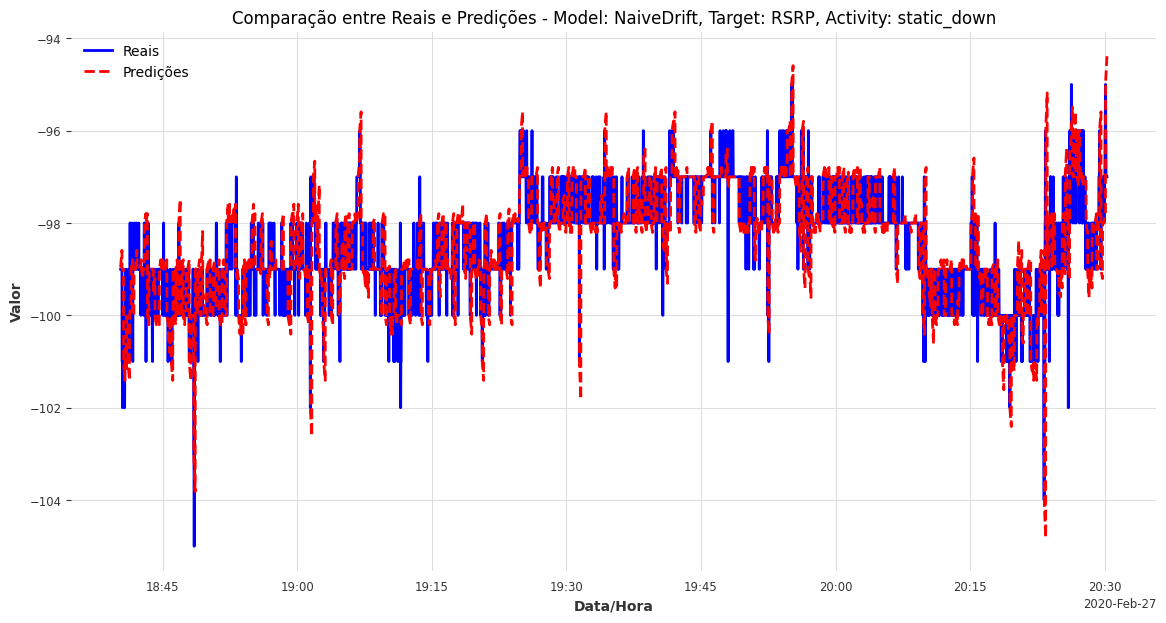

           MAE      RMSE       MSE
2897  0.543507  0.733154  0.537515


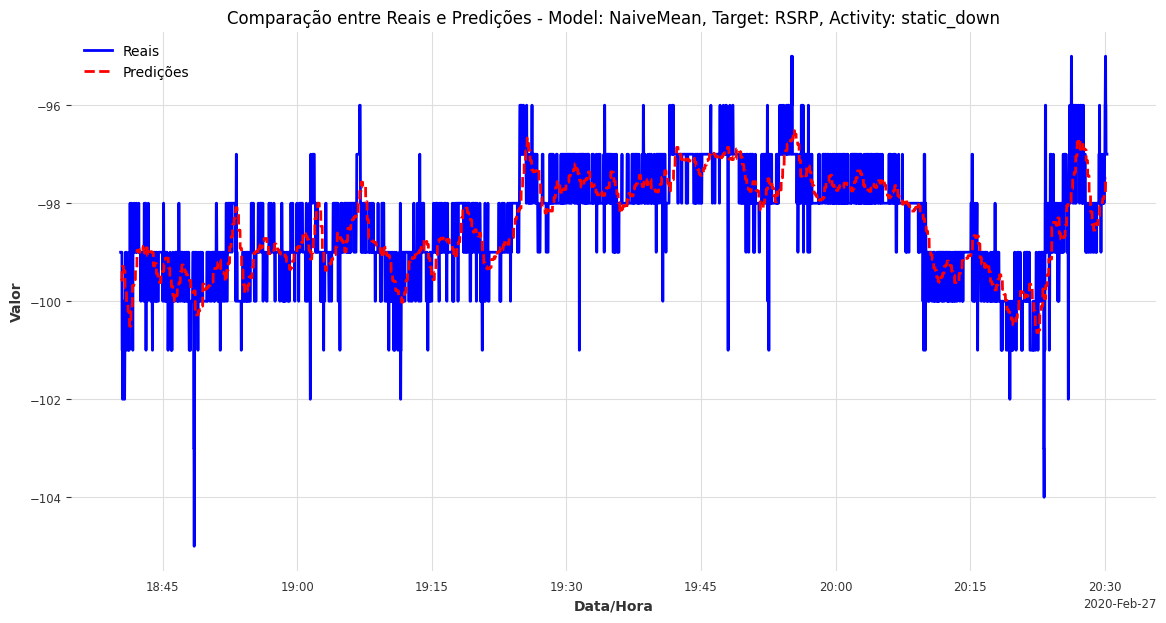

          MAE      RMSE       MSE
802  0.539609  0.730292  0.533327


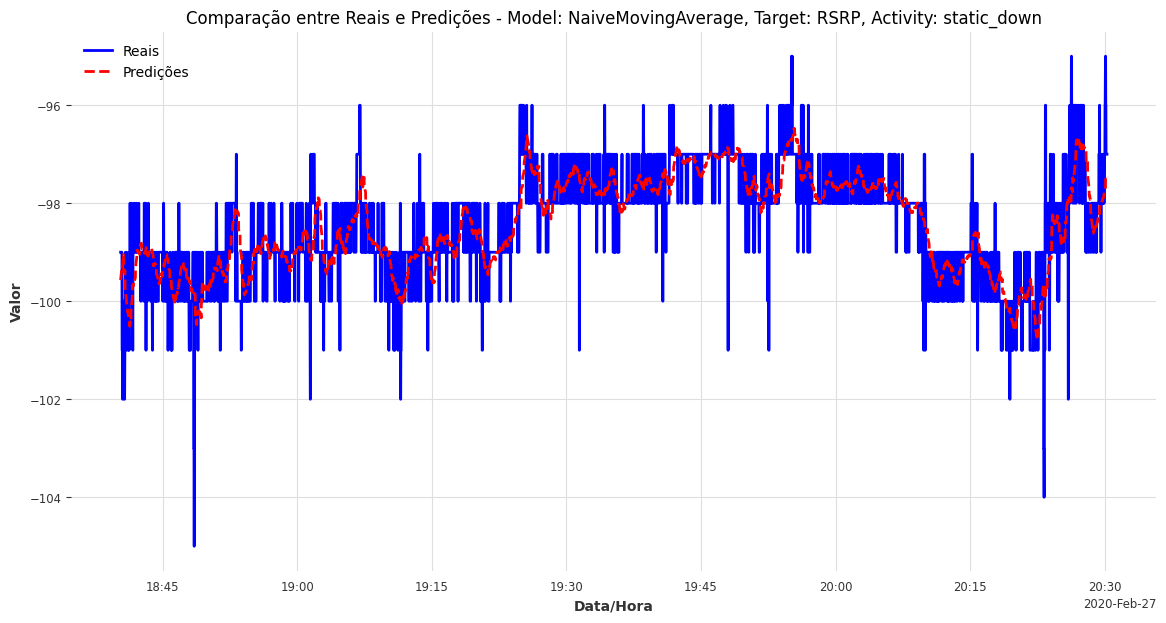

           MAE      RMSE       MSE
3232  0.570166  0.791823  0.626983


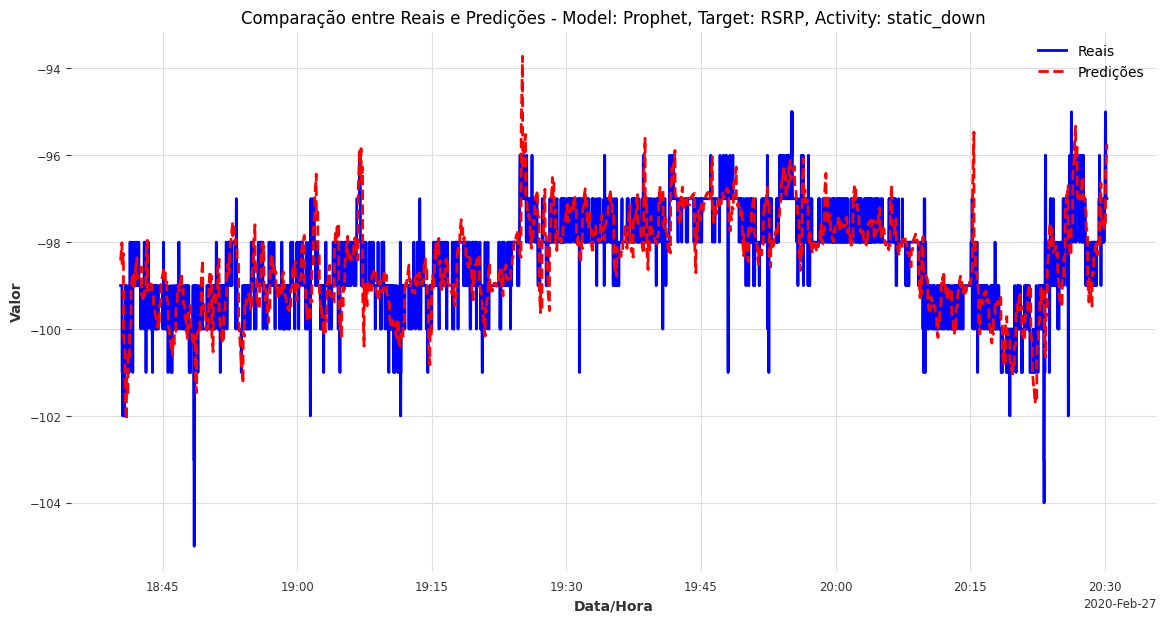

           MAE      RMSE       MSE
1781  0.578923  0.837179  0.700869


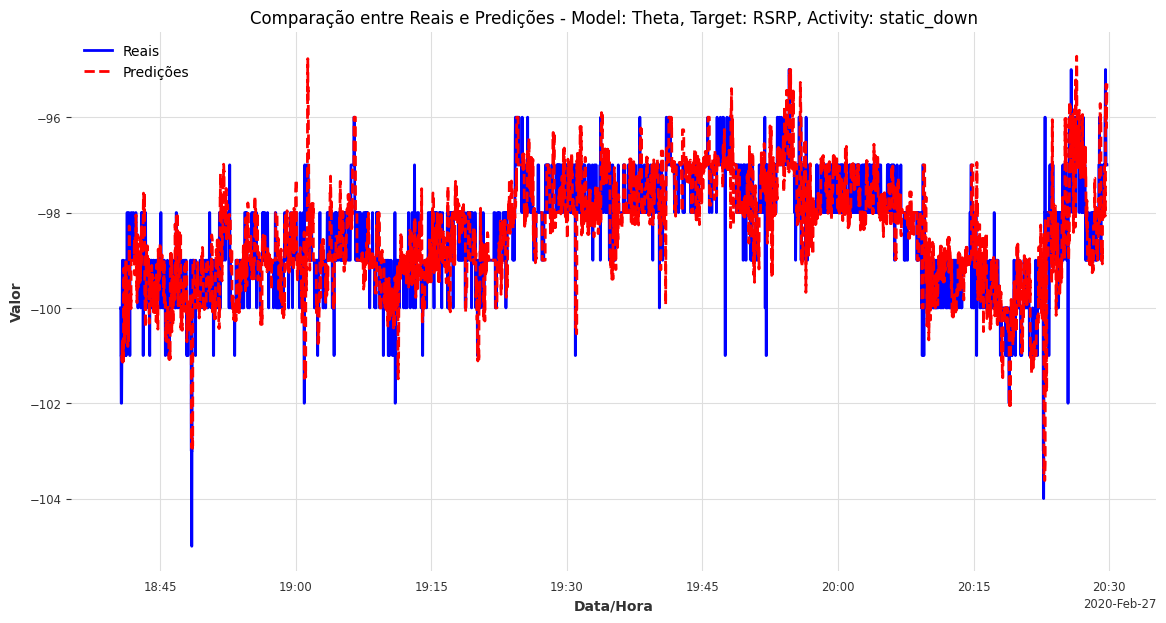

In [20]:
# Exemplo de uso
for model in lowest_mae["Model"].unique():
    plot_actual_vs_preds(lowest_rmse, model=model, target="RSRP", activity="static_down")